# About Loan Tap:

LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.
The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.
LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:
1.	Personal Loan
2.	EMI Free Loan
3.	Personal Overdraft
4.	Advance Salary Loan
This case study will focus on the underwriting process behind Personal Loan only

# Business Problem: 

Given a set of attributes for an Individual, determine if 
•	A credit line should be extended to them. 
•	If so, what should the repayment terms be in business recommendations?

# Column Profiling:

1.	loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
2.	term : The number of payments on the loan. Values are in months and can be either 36 or 60.
3.	int_rate : Interest Rate on the loan
4.	installment : The monthly payment owed by the borrower if the loan originates.
5.	grade : LoanTap assigned loan grade
6.	sub_grade : LoanTap assigned loan subgrade
7.	emp_title :The job title supplied by the Borrower when applying for the loan.*
8.	emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
9.	home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
10.	annual_inc : The self-reported annual income provided by the borrower during registration.
11.	verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
12.	issue_d : The month which the loan was funded
13.	loan_status : Current status of the loan - Target Variable
14.	purpose : A category provided by the borrower for the loan request.
15.	title : The loan title provided by the borrower
16.	dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
17.	earliest_cr_line :The month the borrower's earliest reported credit line was opened
18.	open_acc : The number of open credit lines in the borrower's credit file.
19.	pub_rec : Number of derogatory public records
20.	revol_bal : Total credit revolving balance
21.	revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
22.	total_acc : The total number of credit lines currently in the borrower's credit file
23.	initial_list_status : The initial listing status of the loan. Possible values are – W, F
24.	application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
25.	mort_acc : Number of mortgage accounts.
26.	pub_rec_bankruptcies : Number of public record bankruptcies
27.	Address: Address of the individual

# Importing Libraries:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
from scipy import stats
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')
## Display all the columns of the dataframes
pd.pandas.set_option('display.max_columns',None)
import textwrap

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sns.set_style('darkgrid')

# Functions used in the case study

In [3]:
## Outlier detection function and box potting variables

def outlier_function(dataframe):
    for feature in dataframe.columns:
        if is_numeric_dtype(dataframe[feature]) == True:
            
            plt.rcParams["figure.figsize"] = (20,5)
            
            plt.subplot(121)
            
            Q3 = dataframe[feature].quantile(.75)
            Q1 = dataframe[feature].quantile(.25)
            IQR = Q3 - Q1
            max_value = Q3 + 1.5 * IQR
            min_value = Q1 - 1.5 * IQR

            min_value = 0 if min_value <= 0 else min_value

            values_over_max = dataframe[dataframe[feature] > max_value].count()[0]
            values_under_min = dataframe[dataframe[feature] < min_value].count()[0]

            sns.boxplot(x = feature, data = dataframe
                ,palette = "Set3",  showmeans = True,
                meanprops = {"marker" : "o", "markerfacecolor" : "white", "markersize" : "5", "markeredgecolor" : "black" })

            plt.title(feature + " box plot",fontsize = 18)
            
            ################
            
            plt.subplot(122)
            
            plt.title(feature + " dist plot",fontsize = 18)
            
            sns.distplot(dataframe[feature])
            

            plt.show()

            print(f"Mean is {round(np.mean(dataframe[feature]),0)} | Median is {round(np.median(dataframe[feature]),0)} ")
            print(f"# Outliers over upper limit ({round(max_value,0)}) are {values_over_max}")
            print(f"# Outliers under lower limit ({round(min_value,0)}) are {values_under_min}")
            print(" "*80)
            print("-"*80)
            print(" "*80)

In [4]:
## Outlier Treatment function
def outlier_treatment(df, col, ul , ll):
    
    for feature in col:
        Q3 = df[feature].quantile(.75)
        Q1 = df[feature].quantile(.25)
        IQR = Q3 - Q1
        max_value = Q3 + 1.5 * IQR
        min_value = Q1 - 1.5 * IQR
        if ul == 1:
            df[feature][df[feature] > max_value] = max_value
        elif ll == 1:
            df[feature][df[feature] < min_value] = min_value
        elif ul == 1 and ll == 1:
            df[feature][df[feature] > max_value] = max_value
            df[feature][df[feature] < min_value] = min_value
        else:
            print("Input ul or ll or both as 1")

In [5]:
## Univariate plotting and analysis function

def univariate_plots(dataframe):
    for feature in dataframe.columns[1:]:
        n = len(feature)
        if is_numeric_dtype(dataframe[feature]) == True:
            
            ## Freedman-Diaconis rule (for finding no of bins)
            Q3 = data[feature].quantile(.75)
            Q1 = data[feature].quantile(.25)
            IQR = Q3 - Q1
            max_value = max(data[feature])
            min_value = min(data[feature])
            
            bin_width = (2 * IQR) / (n** (1 / 3))
            bin_count = int(np.ceil((max_value - min_value) / bin_width))
            
            if bin_count < 10:
                ## Sturge’s rule (for finding no of bins)
                bin_count = int(np.ceil(np.log2(n)) + 1)
            
            if bin_count < 10: 
                ## 10 is default
                bin_count = 10
            
            sns.histplot(data = dataframe, x = feature, bins = bin_count ,kde = True)
            plt.title(f"Histplot of {feature}", fontsize = 18)
            plt.xlabel(feature,fontsize = 14)
            plt.ylabel(f"Count of {feature}",fontsize = 14)
            plt.xticks(fontsize = 12)
            plt.yticks(fontsize = 12)
            plt.show()
            print(" "*80)
            print(" "*7 + "-"*74)
            print(" "*80)
        else:
            m = data[feature].nunique()
            sns.countplot(x = feature, data = dataframe, palette = "Set2",order= data[feature].value_counts().index[0:m])
            ageb_txt = list(data[feature].value_counts())

            for idx,val in enumerate(ageb_txt):
                plt.text(idx,val+.1,str(val),fontsize=12,ha="center")
            
            plt.title(f"Countplot of {feature}", fontsize = 18)
            plt.xlabel(feature,fontsize = 14)
            plt.ylabel(f"Count of {feature}",fontsize = 14)
            plt.xticks(fontsize = 12)
            plt.yticks(fontsize = 12)
            plt.show()
            print(" "*80)
            print(" "*7 + "-"*74)
            print(" "*80)

In [6]:
## Color class for highlighting print statements

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [7]:
## Unique value function

def unique_count(dataframe):

    for feature in dataframe.columns:
        if dataframe[feature].nunique() <= 25:
            print(color.BOLD + color.BLUE + "Variable name: " + feature  + color.END)
            print(dataframe[feature].value_counts(normalize = True))
            print(" "*40)
            print("-"*40)
            print(" "*40)
        else:
            print(color.BOLD + color.BLUE + "Variable name: " + feature  + color.END)
            print(f"# unique values =  {dataframe[feature].nunique()}")
            print(f"Data type = {dataframe.dtypes[feature]}")
            print(" "*40)
            print("-"*40)
            print(" "*40)

In [8]:
## Basic description function

def basic_des(cs_name):
    print(color.BOLD + color.BLUE +  f'{cs_name} Shape is {data.shape}' + color.END)
    print()
    print("-" * 80)
    print()
    print(color.BOLD + color.BLUE +  f"{cs_name} Basic Information" + color.END)
    print()
    print(data.info())
    print()
    print("-" * 80)
    print()
    print(color.BOLD + color.BLUE + f"{cs_name} Null value count percentage:" + color.END)
    print()
    print(round(data.isnull().sum(axis=0) / len(data) * 100,2))
    print()
    print("-" * 80)
    print()
    print(color.BOLD + color.BLUE + f"{cs_name} Description:" + color.END)
    print()
    print(data.describe())
    print()
    print("-" * 80)
    print()
    print(color.BOLD + color.BLUE + f"{cs_name} Deep Description:" + color.END)
    print()
    print(data.describe().T)
    print()
    print("-" * 80)
    print()
    print(color.BOLD + color.BLUE + f"{cs_name} Duplicate values:" + color.END)
    print()
    print(data.loc[data.duplicated()])
    print(color.BOLD + color.BLUE + f"Number of duplicated values is/are: {data.duplicated().sum()}" + color.END)
    print()
    print("-" * 80)
    print()
    print(color.BOLD + color.BLUE + f"{cs_name} Number of unique values:" + color.END)
    print()
    print(data.nunique())
    print()
    print("-" * 80)


In [9]:
def missing_to_df(df):
    #Number and percentage of missing data in training data set for each column
    total_missing_df = df.isnull().sum().sort_values(ascending =False)
    percent_missing_df = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing_data_df = pd.concat([total_missing_df, percent_missing_df], axis=1, keys=['Total', 'Percent'])
    return missing_data_df

# Exploratory Data Analysis

## 1. Reading the data:

In [10]:
data = pd.read_csv("LoanTap.csv")

## 2. Basic Statistics on preprocessed data

In [11]:
basic_des("Loan Tap case study -")

Loan Tap case study - Shape is (396030, 27)

--------------------------------------------------------------------------------

Loan Tap case study - Basic Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  o

## 3. Unique value details

In [12]:
unique_count(data)

Variable name: loan_amnt
# unique values =  1397
Data type = float64
                                        
----------------------------------------
                                        
Variable name: term
 36 months    0.762581
 60 months    0.237419
Name: term, dtype: float64
                                        
----------------------------------------
                                        
Variable name: int_rate
# unique values =  566
Data type = float64
                                        
----------------------------------------
                                        
Variable name: installment
# unique values =  55706
Data type = float64
                                        
----------------------------------------
                                        
Variable name: grade
B    0.292953
C    0.267624
A    0.162076
D    0.160402
E    0.079509
F    0.029725
G    0.007712
Name: grade, dtype: float64
                                        
-------------------

## 4. Dataset basic inspection

In [13]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [14]:
data.tail()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."
396029,2000.0,36 months,13.61,67.98,C,C2,Internal Revenue Service,10+ years,RENT,42996.0,Verified,Jun-2010,Fully Paid,debt_consolidation,Toxic Debt Payoff,8.32,Sep-1998,3.0,0.0,4292.0,91.3,19.0,f,INDIVIDUAL,NaN,0.0,"787 Michelle Causeway\r\nBriannaton, AR 48052"


# Data Preprocessing

## 1. Missing Value Treatment

In [15]:
## Column "title" is detailes column for "purpose" and many a times it is same as "purpose"
## So filling the missing "title" as "purpose"

In [16]:
data["title"] = data["title"].fillna((data["purpose"]))

In [17]:
## Filling "emp_title", "emp_length", "revol_util", "mort_acc", "pub_rec_bankruptcies" with most frequent occuring values

In [18]:
data["emp_title"] = data["emp_title"].fillna((data["emp_title"].mode()[0]))
data["emp_length"] = data["emp_length"].fillna((data["emp_length"].mode()[0]))
data["revol_util"] = data["revol_util"].fillna((data["revol_util"].mode()[0]))
data["mort_acc"] = data["mort_acc"].fillna((data["mort_acc"].mode()[0]))
data["pub_rec_bankruptcies"] = data["pub_rec_bankruptcies"].fillna((data["pub_rec_bankruptcies"].mode()[0]))

In [19]:
## Checking if we still have missing values
data.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

## 2. Questionnaire (First 5 questions)

### 1. What percentage of customers have fully paid their Loan Amount?

In [20]:
data["loan_status"][data["loan_status"] == 1].value_counts() / data["loan_status"].count()

Series([], Name: loan_status, dtype: float64)

### Comment:
- 80 % customers have fully paid their loan amount

### 2. Comment about the correlation between Loan Amount and Installment features.

In [21]:
np.corrcoef(data["loan_amnt"],data["installment"])[0, 1]

0.9539289082616221

### Comment:
- Loan Amount & Installment are 95% correlated
- Huge multicorrelation, may need to remove either Loan Amount or Installment

### 3.The majority of people have home ownership as _______.

In [22]:
round(data["home_ownership"].value_counts() / data["home_ownership"].count()*100,0)

MORTGAGE    50.0
RENT        40.0
OWN         10.0
OTHER        0.0
NONE         0.0
ANY          0.0
Name: home_ownership, dtype: float64

### Comment:
- Mortgage is 50%, rent is 40% and Own is 10% as home ownership 
- Rest are negligible

### 4. People with grades ‘A’ are more likely to fully pay their loan. (T/F)

In [23]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [24]:
round(pd.crosstab(index=data['grade'], columns=data['loan_status'], margins=True,normalize = True) * 100,0)

loan_status,Charged Off,Fully Paid,All
grade,,,
A,1.0,15.0,16.0
B,4.0,26.0,29.0
C,6.0,21.0,27.0
D,5.0,11.0,16.0
E,3.0,5.0,8.0
F,1.0,2.0,3.0
G,0.0,0.0,1.0
All,20.0,80.0,100.0


### Comment: True
- 15/16 ~ 94% people from Group A have fully paid their loan amount
- Group B is next best with ~ 90% (26/29) individuals who have fully paid their loan amount

### 5. Name the top 2 afforded job titles.

In [25]:
round(data["emp_title"].value_counts() / data["emp_title"].count()*100,0)

Teacher                             7.0
Manager                             1.0
Registered Nurse                    0.0
RN                                  0.0
Supervisor                          0.0
                                   ... 
millington savings bank             0.0
Law Office of Barbara Smith         0.0
Export Control Specialist           0.0
2nd Lieutenant                      0.0
The Law Office of Brian K. Ayson    0.0
Name: emp_title, Length: 173105, dtype: float64

### Comment:
- Teacher (7% individuals) & Manager (1% individuals) are the two afforded job titles

## Bi variate Analysis

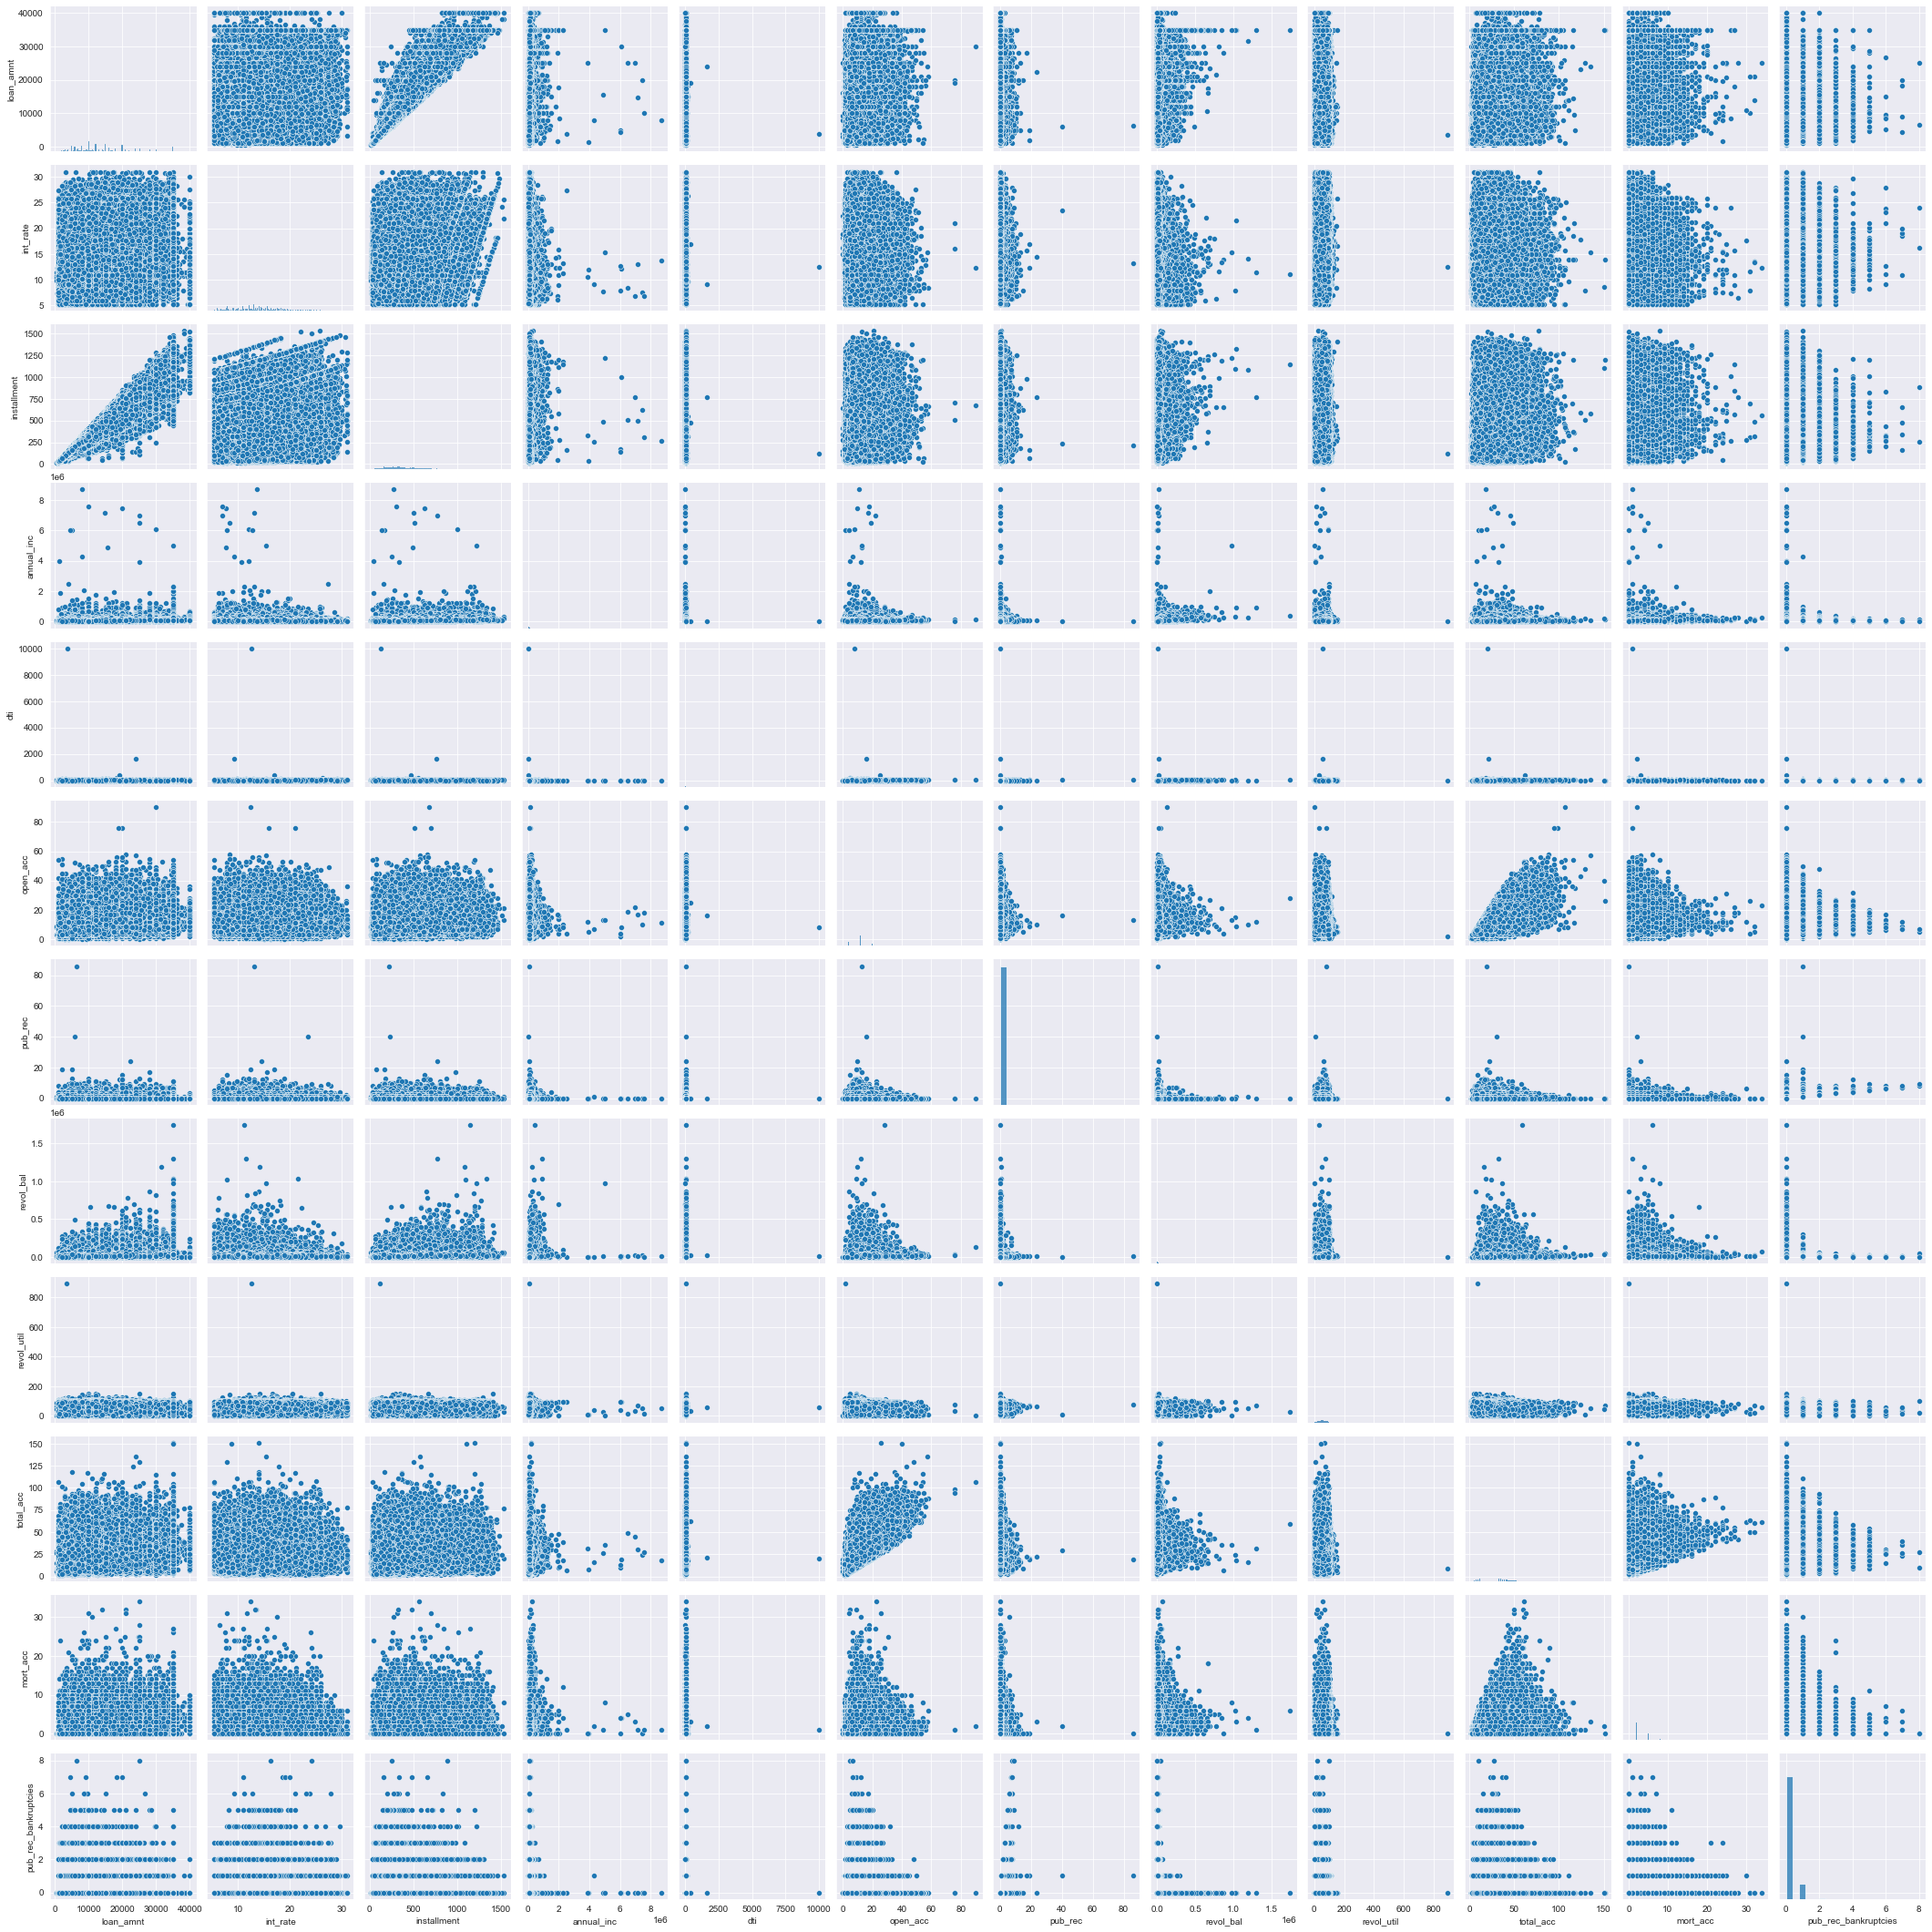

In [26]:
sns.pairplot(data)
plt.show()

## 2. Feature Engineering

### A. Categorical to Ordinal update

In [27]:
data['term'].replace([' 36 months', ' 60 months'], [0, 1], inplace=True)

In [28]:
data['loan_status'].replace(['Fully Paid', 'Charged Off'], [1, 0], inplace=True)

In [29]:
data['emp_length'].replace(['< 1 year', '1 year','2 years','3 years','4 years','5 years','6 years','7 years'
                            ,'8 years','9 years','10+ years'], [0,1,2,3,4,5,6,7,8,9,10], inplace=True)

### B. Converting date columns to Year and Month columns

In [30]:
data["earliest_cr_line"] = data["earliest_cr_line"].astype("datetime64")
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'], format='%Y-%m-%d')
data["earliest_cr_line_month"] = data["earliest_cr_line"].dt.month
data["earliest_cr_line_year"] = data["earliest_cr_line"].dt.year

In [31]:
data = data.drop('earliest_cr_line',axis = 1)

In [32]:
data["issue_d"] = data["issue_d"].astype("datetime64")
data['issue_d'] = pd.to_datetime(data['issue_d'], format='%Y-%m-%d')
data["issue_d_month"] = data["issue_d"].dt.month
data["issue_d_year"] = data["issue_d"].dt.year

In [33]:
data = data.drop('issue_d',axis = 1)

### C. Combining F & G subgrades to show only grades

- F & G grades are having least no of individuals and with very less loan amount
- Shrinking them to only show grades should not result in loss of information

In [34]:
data['sub_grade'][data['grade'] == "F"] = "F"
data['sub_grade'][data['grade'] == "G"] = "G"

### D. Creating a "Non_dept" category in purpose deature

- Since 'debt_consolidation' and 'credit_card' are the major categories and both are to manage earlier debts
- Hence creating a new category "Non_debt" which is to create something new

In [35]:
data["purpose"][~data["purpose"].isin(['debt_consolidation','credit_card'])] = "Non_dept"

### E. Label Encoding of Categorical columns

In [36]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [37]:
# Encode labels in column 'application_type'
data['application_type']= label_encoder.fit_transform(data['application_type'])
data['initial_list_status']= label_encoder.fit_transform(data['initial_list_status'])
data['application_type']= label_encoder.fit_transform(data['application_type'])
data['purpose']= label_encoder.fit_transform(data['purpose'])
data['verification_status']= label_encoder.fit_transform(data['verification_status'])
data['home_ownership']= label_encoder.fit_transform(data['home_ownership'])
data['grade']= label_encoder.fit_transform(data['grade'])
data['sub_grade']= label_encoder.fit_transform(data['sub_grade'])

### F. Creating Pincode column from Address

In [38]:
data["Pincode"] = data["address"].str[-5:]

In [39]:
data["Pincode"].unique()

array(['22690', '05113', '00813', '11650', '30723', '70466', '29597',
       '48052', '86630', '93700'], dtype=object)

### G. Zero & 1 Flag

In [40]:
data["pub_rec"] = np.where(data["pub_rec"] > 1, 1, 0)

In [41]:
data["mort_acc"] = np.where(data["mort_acc"] > 1, 1, 0)

In [42]:
data["pub_rec_bankruptcies"] = np.where(data["pub_rec_bankruptcies"] > 1, 1, 0)

### H. Remove Few Columns

In [43]:
data = data.drop('title',axis = 1)
data = data.drop('emp_title',axis = 1)
data = data.drop('address',axis = 1)

### Visual inspection of features

In [44]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year,Pincode
0,10000.0,0,11.44,329.48,1,8,10,5,117000.0,0,1,0,26.24,16.0,0,36369.0,41.8,25.0,1,1,0,0,6,1990,1,2015,22690
1,8000.0,0,11.99,265.68,1,9,4,1,65000.0,0,1,2,22.05,17.0,0,20131.0,53.3,27.0,0,1,1,0,7,2004,1,2015,05113
2,15600.0,0,10.49,506.97,1,7,0,5,43057.0,1,1,1,12.79,13.0,0,11987.0,92.2,26.0,0,1,0,0,8,2007,1,2015,05113
3,7200.0,0,6.49,220.65,0,1,6,5,54000.0,0,1,1,2.60,6.0,0,5472.0,21.5,13.0,0,1,0,0,9,2006,11,2014,00813
4,24375.0,1,17.27,609.33,2,14,9,1,55000.0,2,0,1,33.95,13.0,0,24584.0,69.8,43.0,0,1,0,0,3,1999,4,2013,11650


## 3. Outlier detection

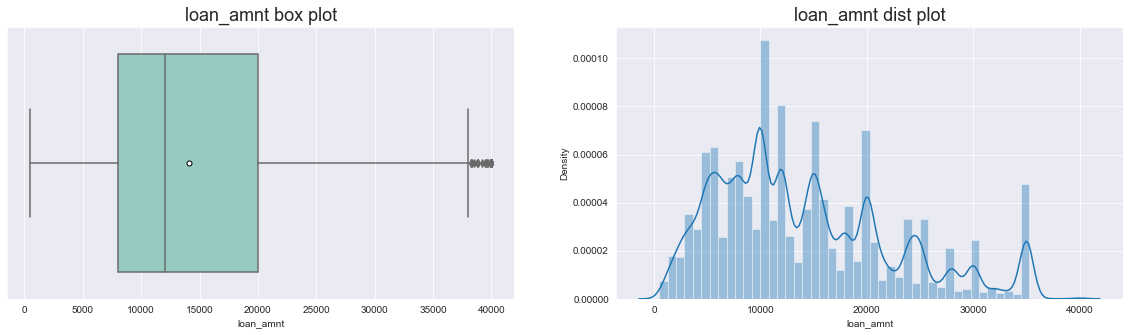

Mean is 14114.0 | Median is 12000.0 
# Outliers over upper limit (38000.0) are 191
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


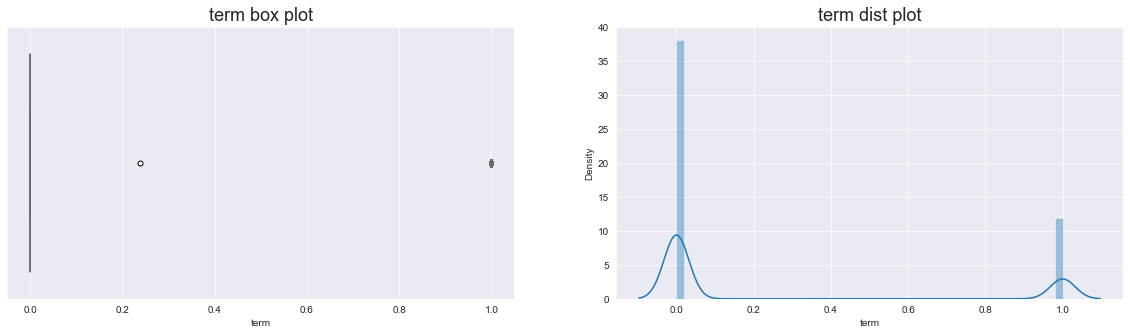

Mean is 0.0 | Median is 0.0 
# Outliers over upper limit (0.0) are 94025
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


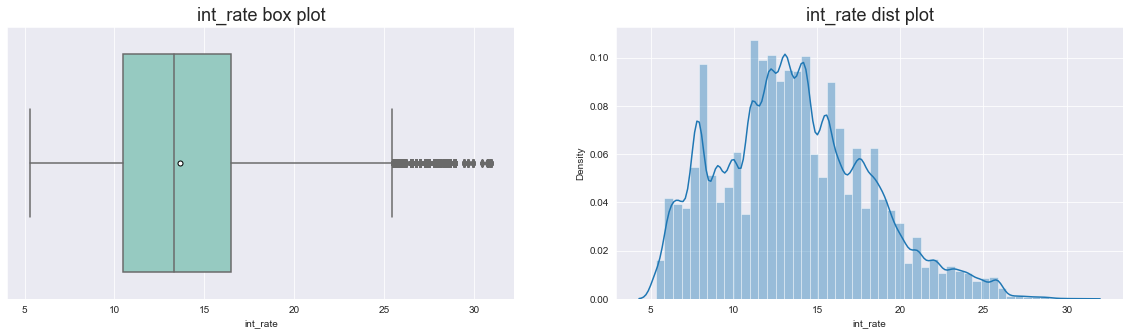

Mean is 14.0 | Median is 13.0 
# Outliers over upper limit (25.0) are 3777
# Outliers under lower limit (1.0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


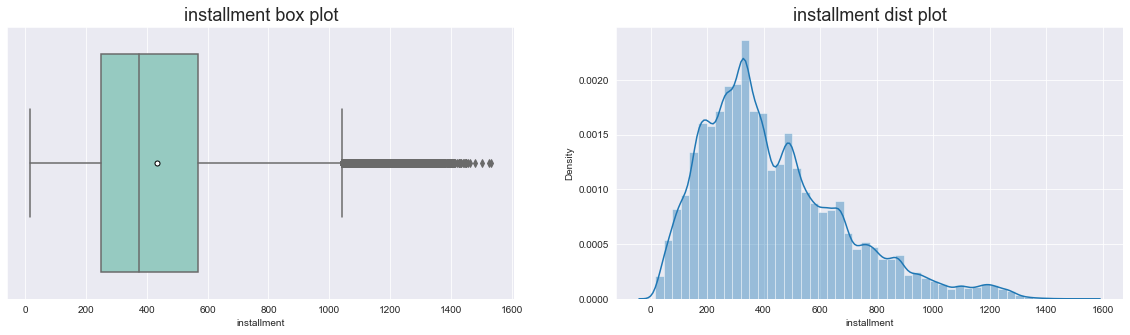

Mean is 432.0 | Median is 375.0 
# Outliers over upper limit (1043.0) are 11250
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


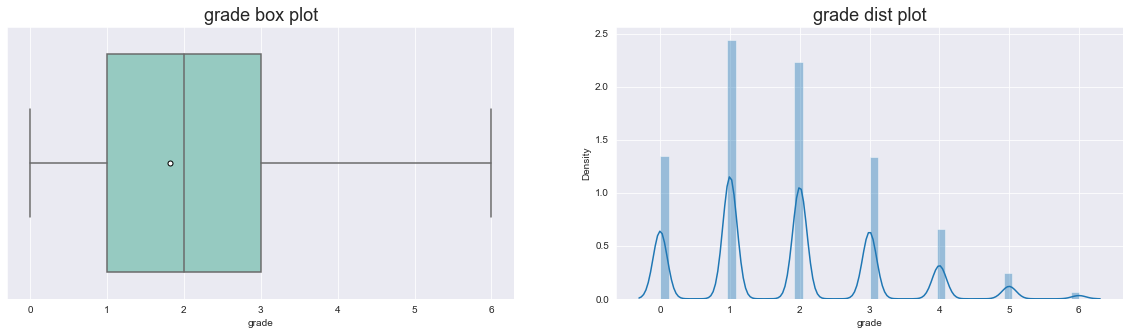

Mean is 2.0 | Median is 2.0 
# Outliers over upper limit (6.0) are 0
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


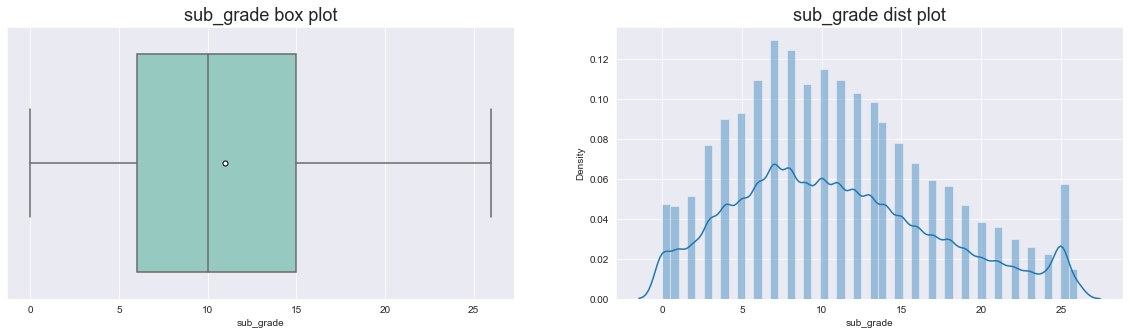

Mean is 11.0 | Median is 10.0 
# Outliers over upper limit (28.0) are 0
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


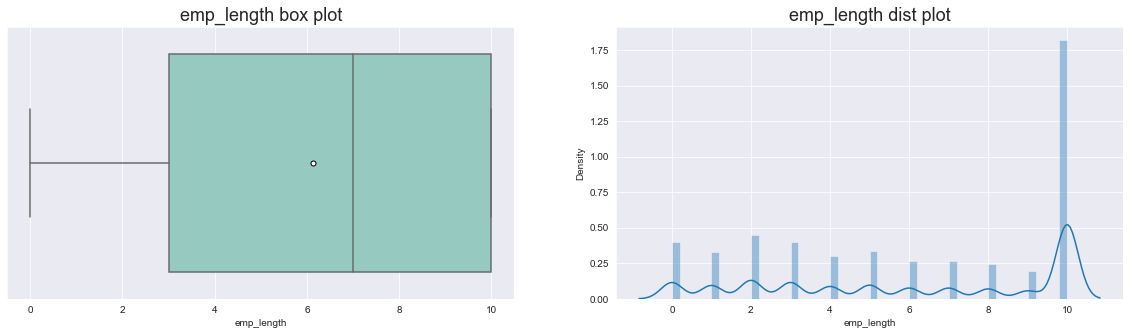

Mean is 6.0 | Median is 7.0 
# Outliers over upper limit (20.0) are 0
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


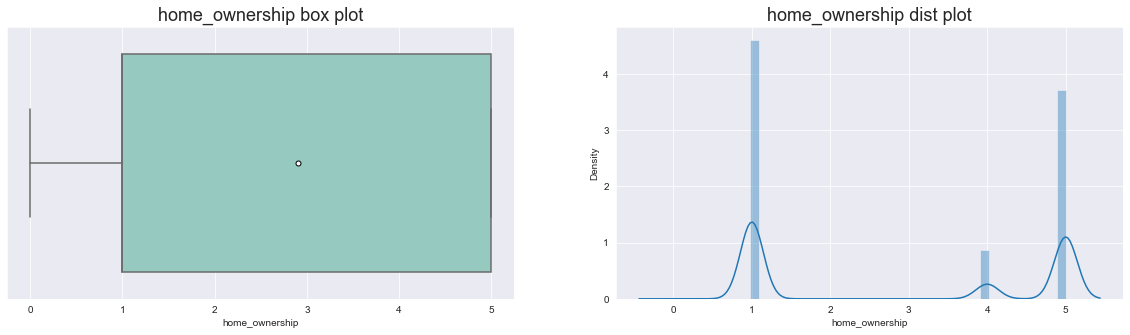

Mean is 3.0 | Median is 1.0 
# Outliers over upper limit (11.0) are 0
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


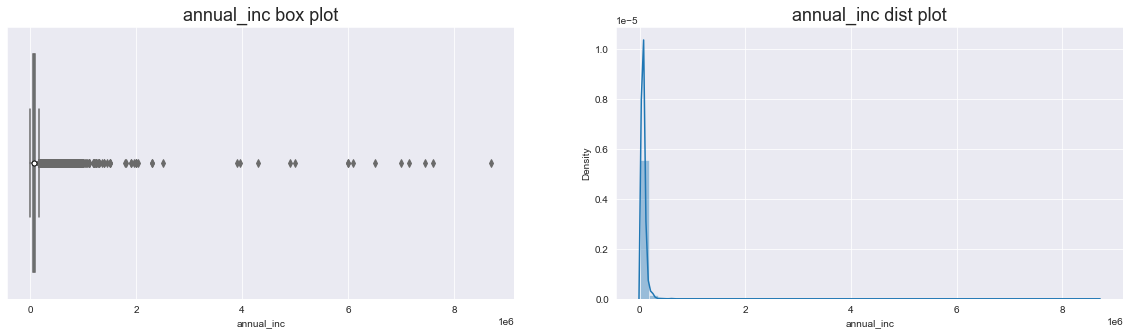

Mean is 74203.0 | Median is 64000.0 
# Outliers over upper limit (157500.0) are 16700
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


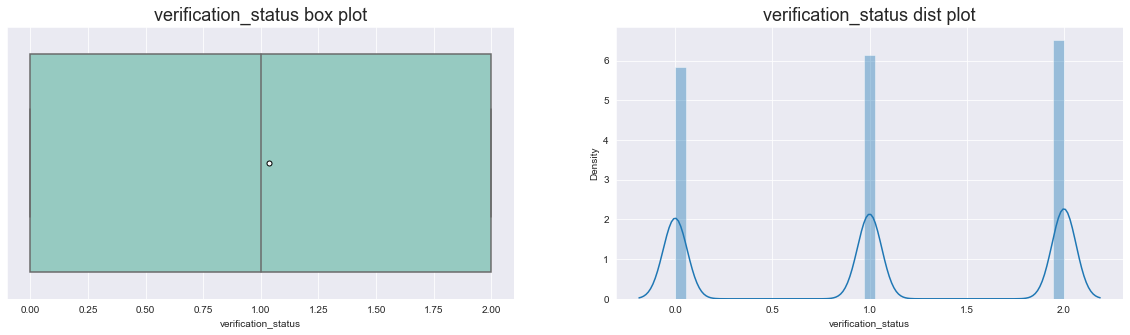

Mean is 1.0 | Median is 1.0 
# Outliers over upper limit (5.0) are 0
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


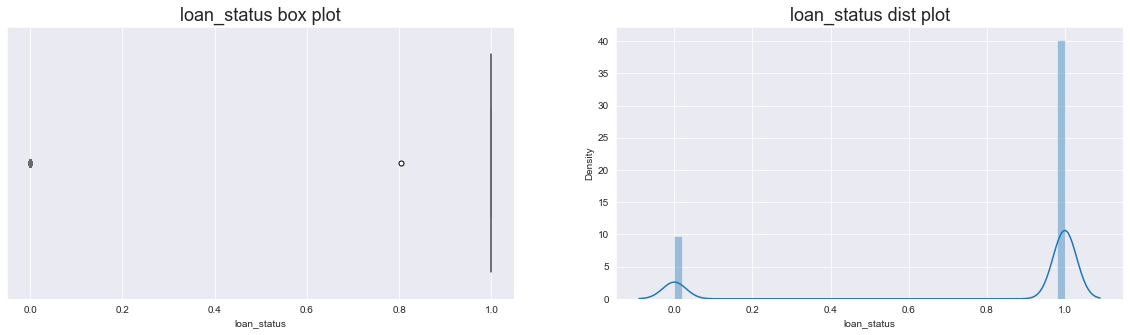

Mean is 1.0 | Median is 1.0 
# Outliers over upper limit (1.0) are 0
# Outliers under lower limit (1.0) are 77673
                                                                                
--------------------------------------------------------------------------------
                                                                                


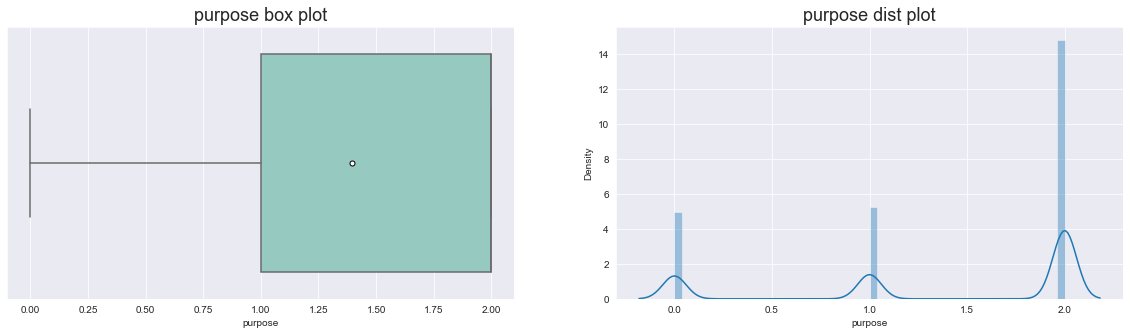

Mean is 1.0 | Median is 2.0 
# Outliers over upper limit (4.0) are 0
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


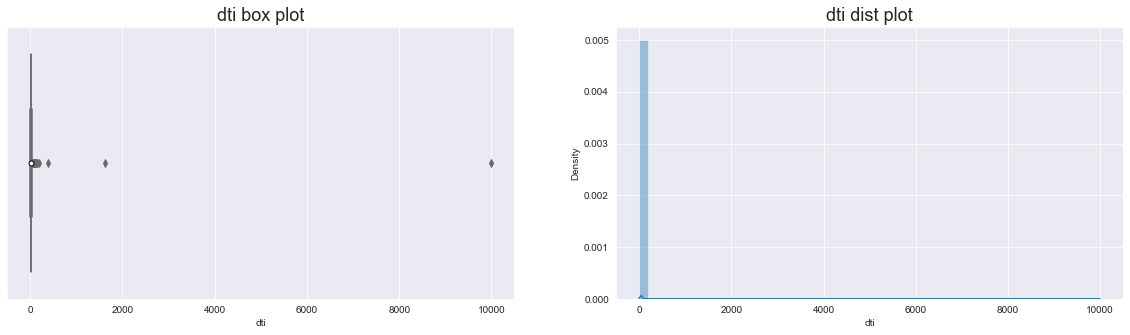

Mean is 17.0 | Median is 17.0 
# Outliers over upper limit (41.0) are 275
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


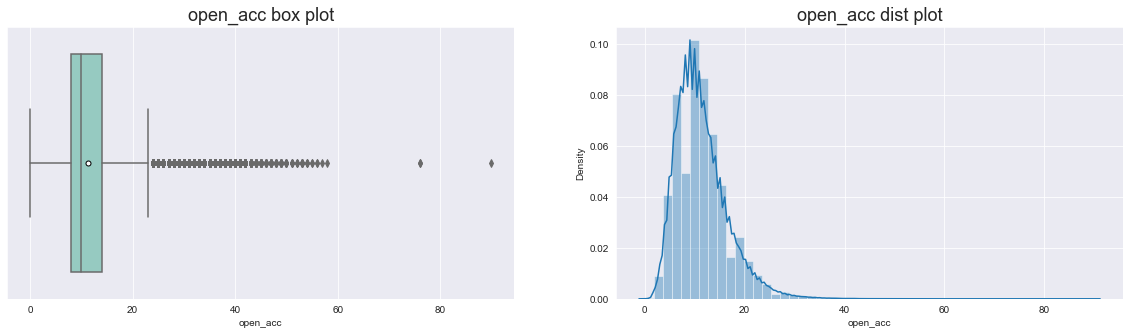

Mean is 11.0 | Median is 10.0 
# Outliers over upper limit (23.0) are 10307
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


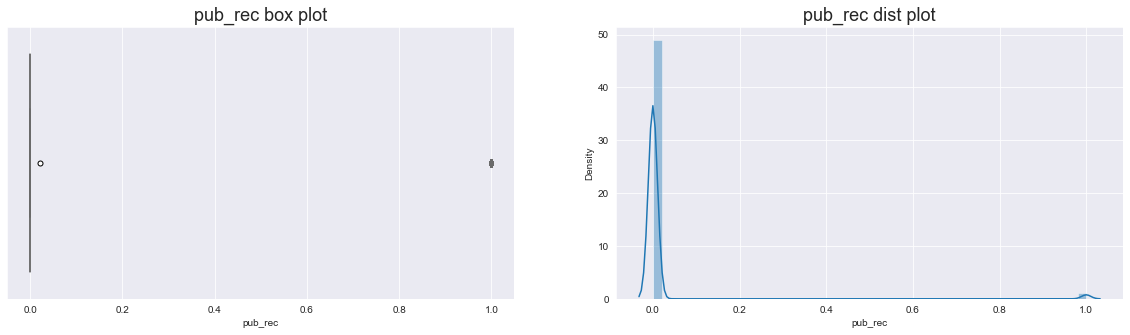

Mean is 0.0 | Median is 0.0 
# Outliers over upper limit (0.0) are 8019
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


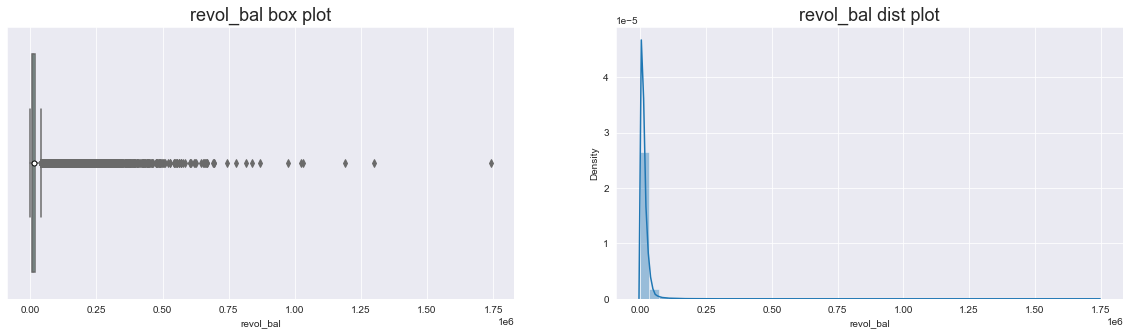

Mean is 15845.0 | Median is 11181.0 
# Outliers over upper limit (40012.0) are 21259
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


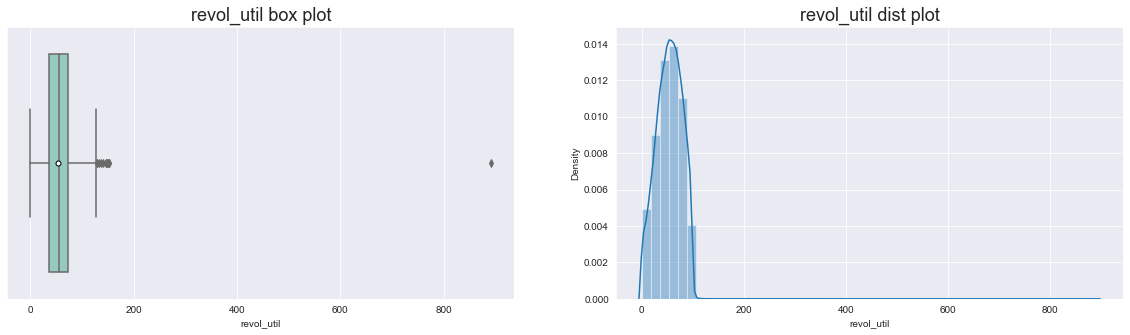

Mean is 54.0 | Median is 55.0 
# Outliers over upper limit (129.0) are 12
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


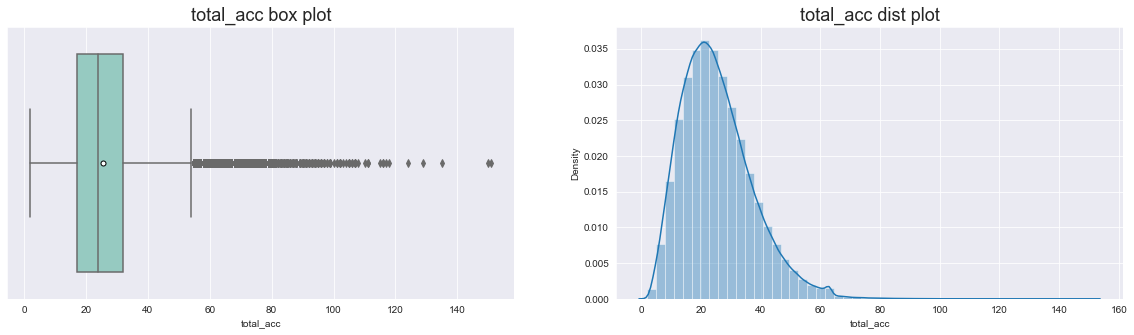

Mean is 25.0 | Median is 24.0 
# Outliers over upper limit (54.0) are 8499
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


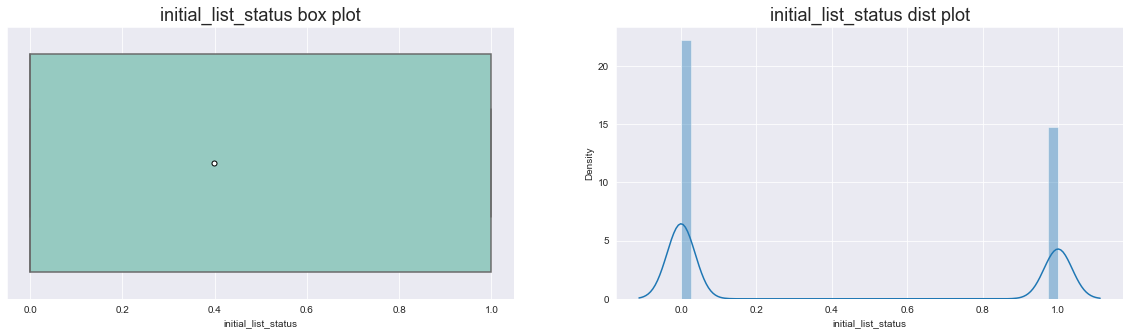

Mean is 0.0 | Median is 0.0 
# Outliers over upper limit (2.0) are 0
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


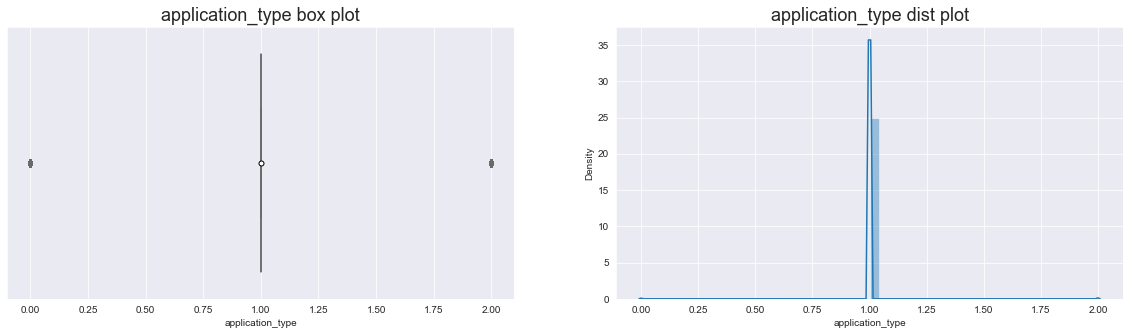

Mean is 1.0 | Median is 1.0 
# Outliers over upper limit (1.0) are 425
# Outliers under lower limit (1.0) are 286
                                                                                
--------------------------------------------------------------------------------
                                                                                


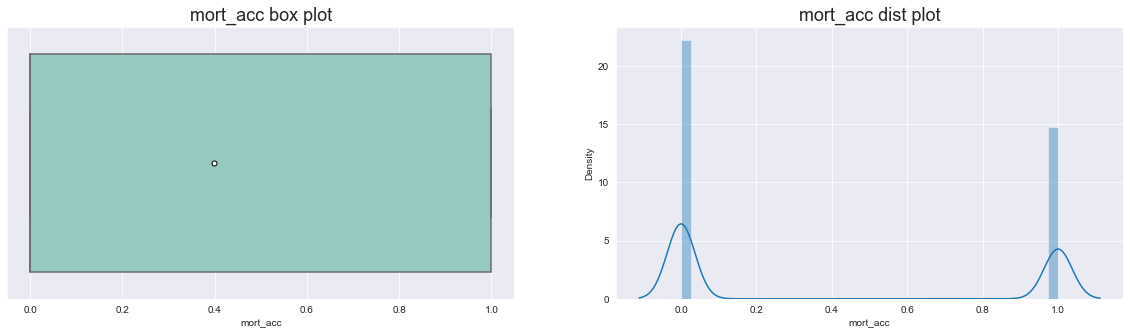

Mean is 0.0 | Median is 0.0 
# Outliers over upper limit (2.0) are 0
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


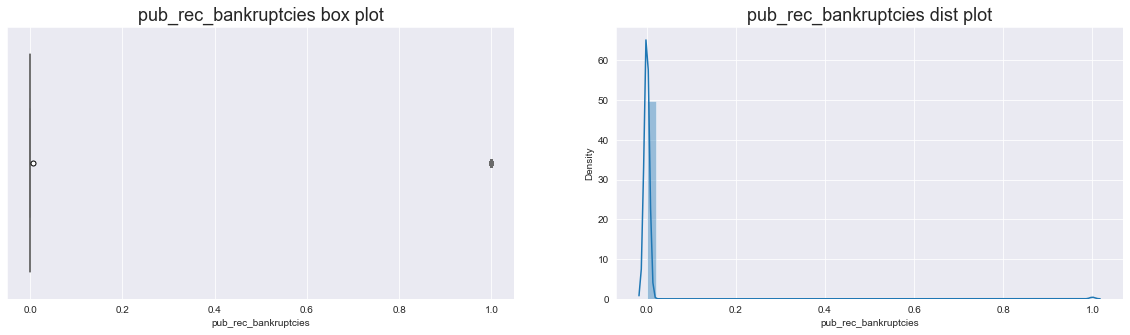

Mean is 0.0 | Median is 0.0 
# Outliers over upper limit (0.0) are 2325
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


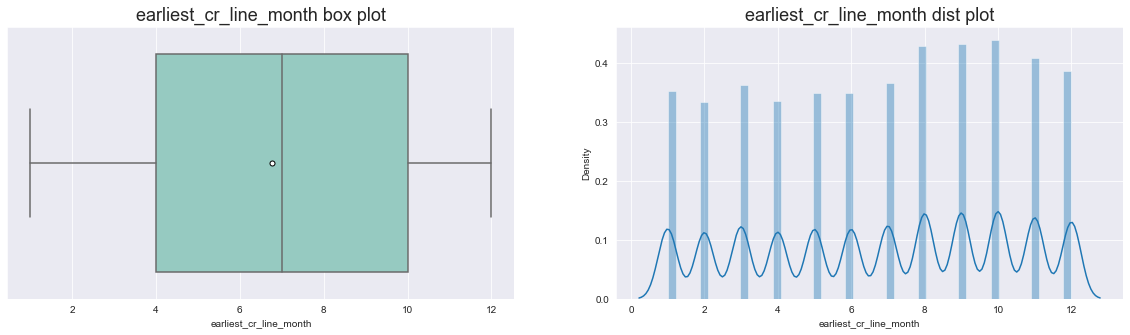

Mean is 7.0 | Median is 7.0 
# Outliers over upper limit (19.0) are 0
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


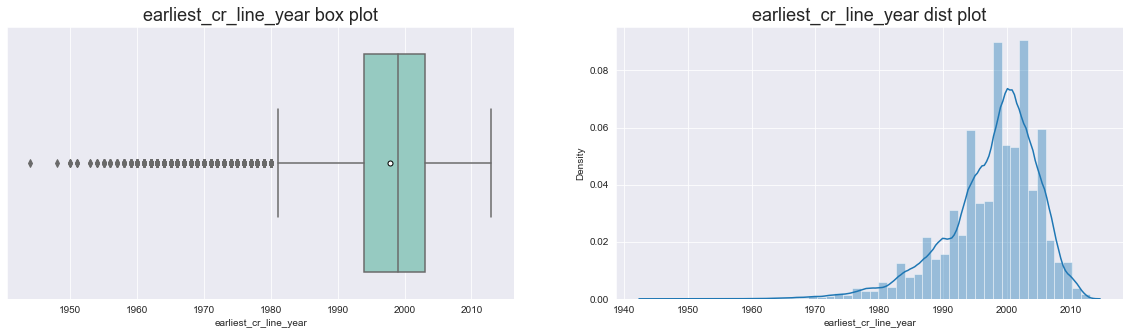

Mean is 1998.0 | Median is 1999.0 
# Outliers over upper limit (2016.0) are 0
# Outliers under lower limit (1980.0) are 10629
                                                                                
--------------------------------------------------------------------------------
                                                                                


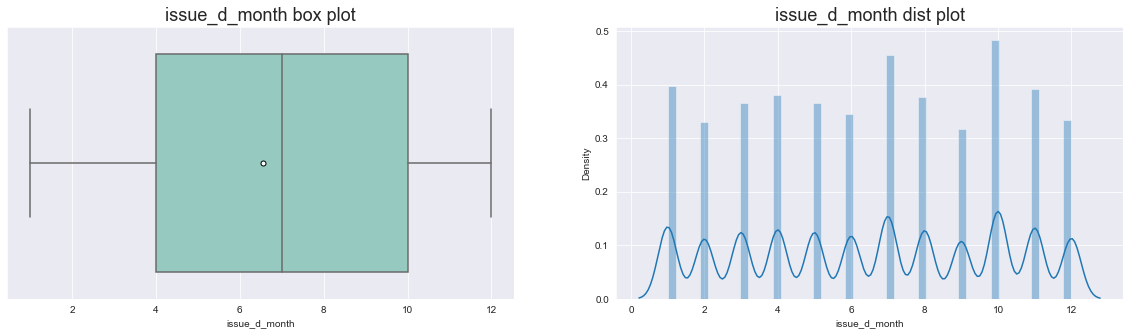

Mean is 7.0 | Median is 7.0 
# Outliers over upper limit (19.0) are 0
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


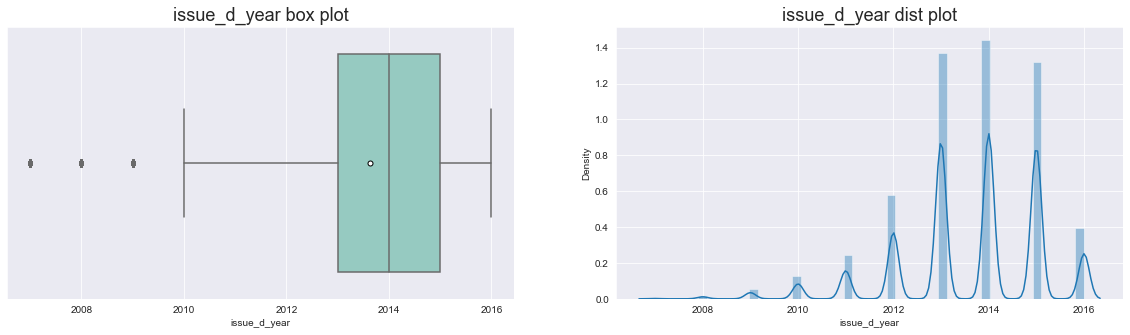

Mean is 2014.0 | Median is 2014.0 
# Outliers over upper limit (2018.0) are 0
# Outliers under lower limit (2010.0) are 5261
                                                                                
--------------------------------------------------------------------------------
                                                                                


In [45]:
outlier_function(data)

## 4. Outlier Treatment

- Using Outlier function declared above

### Treating when outliers are at max part

In [46]:
column = ['int_rate','loan_amnt','total_acc','revol_util','dti','open_acc','installment', 'annual_inc','revol_bal'] 

In [47]:
outlier_treatment(data,column,1,0)

### Treating when outliers are at min part

In [48]:
column2 = ['earliest_cr_line_year', 'issue_d_year']

In [49]:
outlier_treatment(data,column2,0,1)

### Verifying if Outliers are removed 

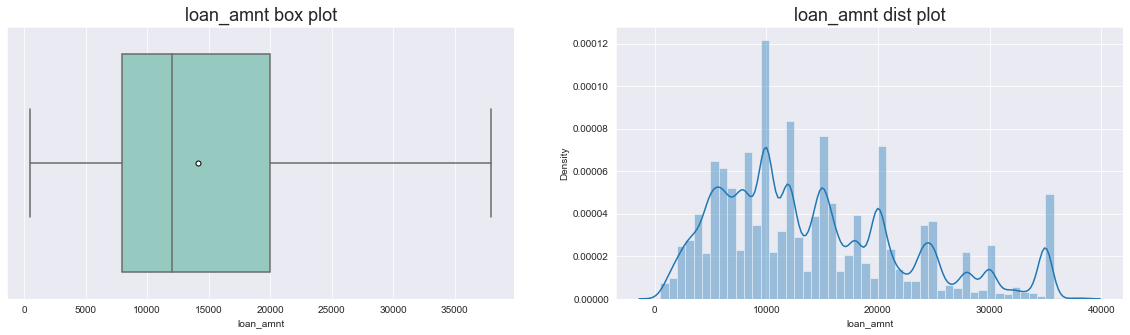

Mean is 14113.0 | Median is 12000.0 
# Outliers over upper limit (38000.0) are 0
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


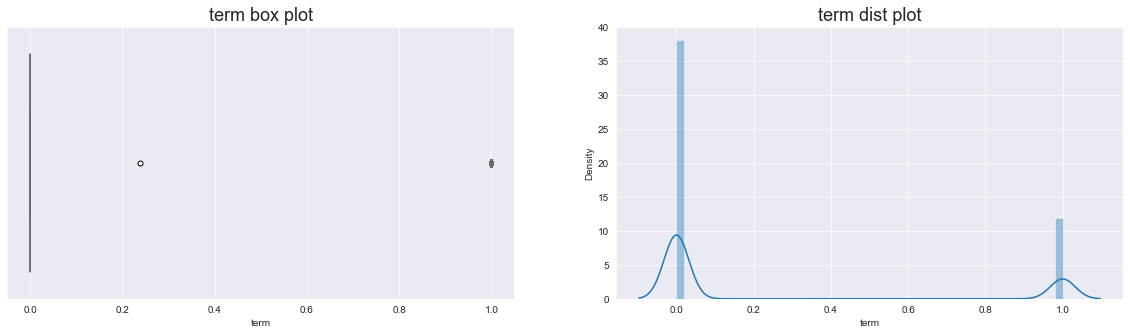

Mean is 0.0 | Median is 0.0 
# Outliers over upper limit (0.0) are 94025
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


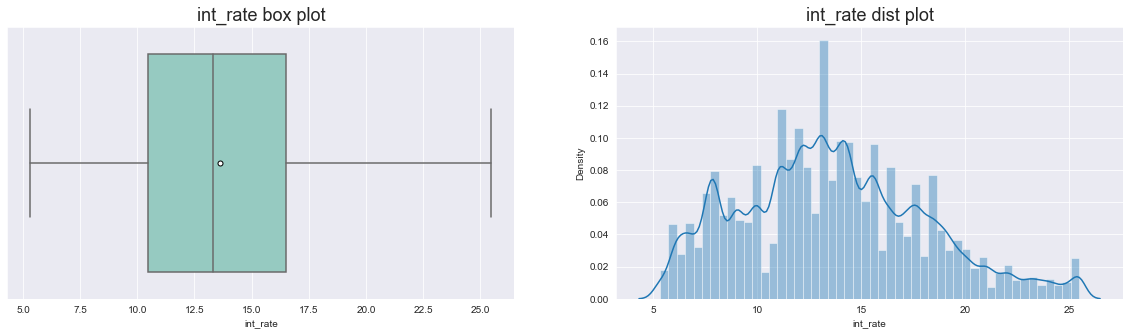

Mean is 14.0 | Median is 13.0 
# Outliers over upper limit (25.0) are 0
# Outliers under lower limit (1.0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


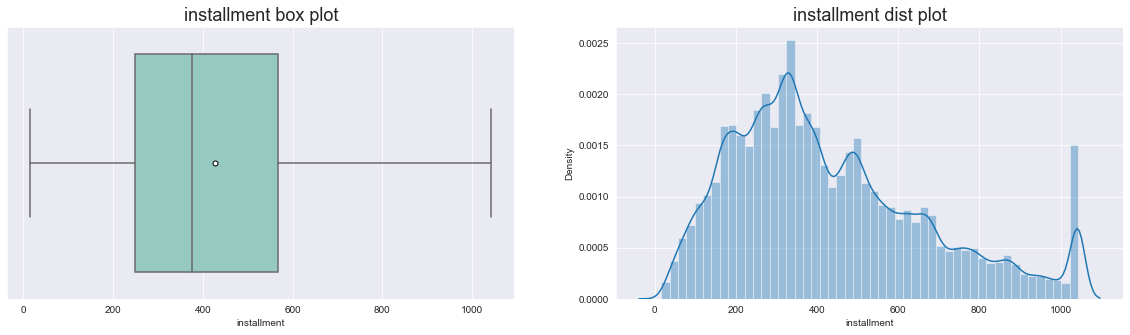

Mean is 428.0 | Median is 375.0 
# Outliers over upper limit (1043.0) are 0
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


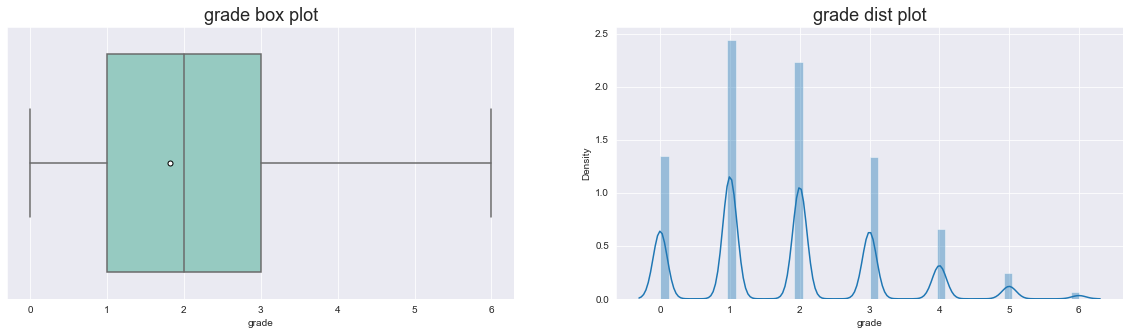

Mean is 2.0 | Median is 2.0 
# Outliers over upper limit (6.0) are 0
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


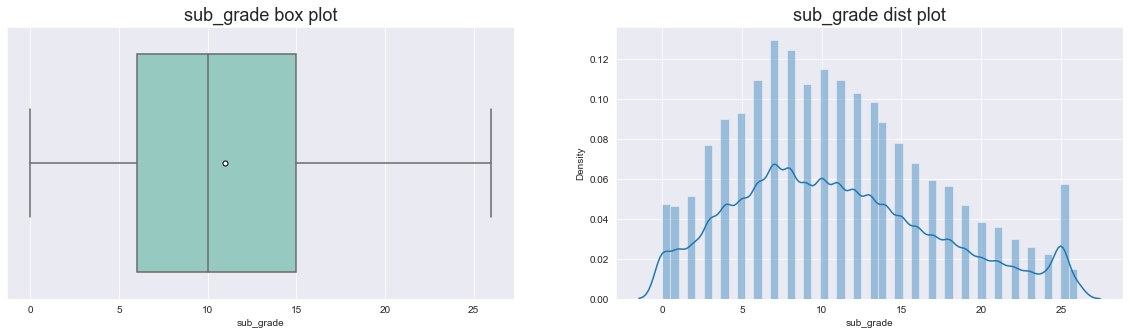

Mean is 11.0 | Median is 10.0 
# Outliers over upper limit (28.0) are 0
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


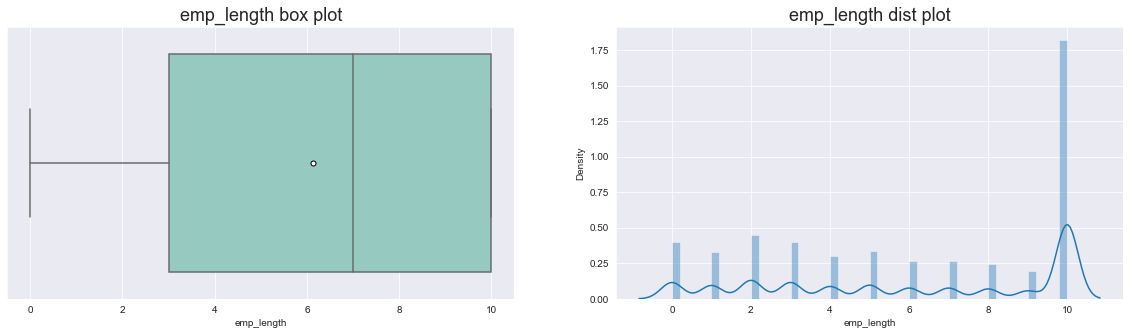

Mean is 6.0 | Median is 7.0 
# Outliers over upper limit (20.0) are 0
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


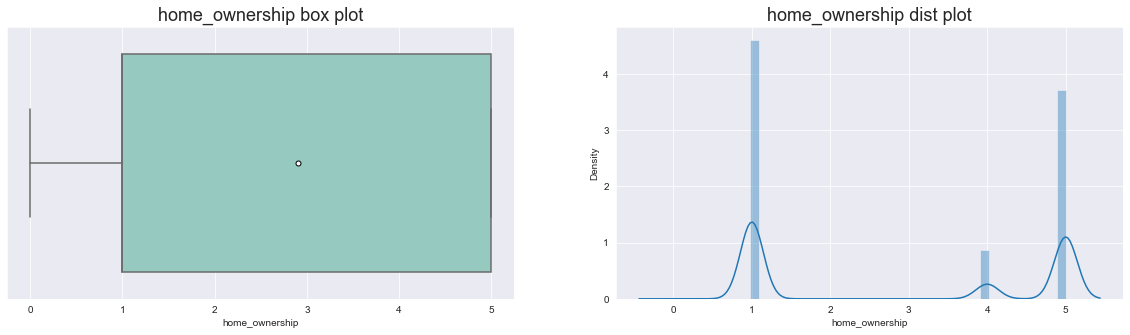

Mean is 3.0 | Median is 1.0 
# Outliers over upper limit (11.0) are 0
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


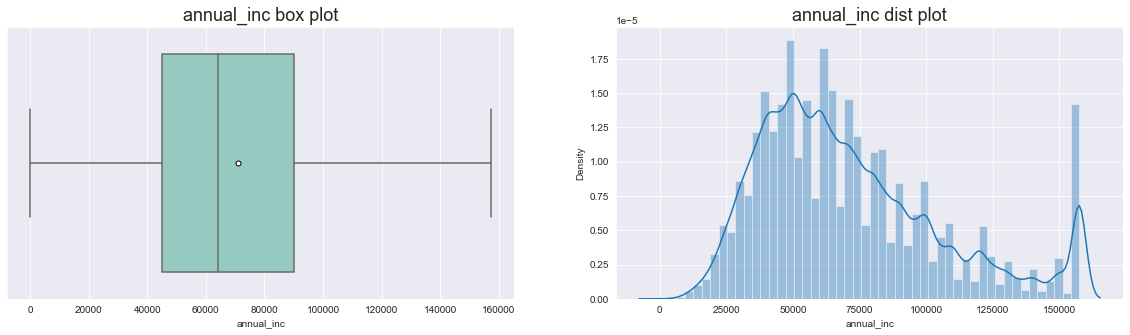

Mean is 70990.0 | Median is 64000.0 
# Outliers over upper limit (157500.0) are 0
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


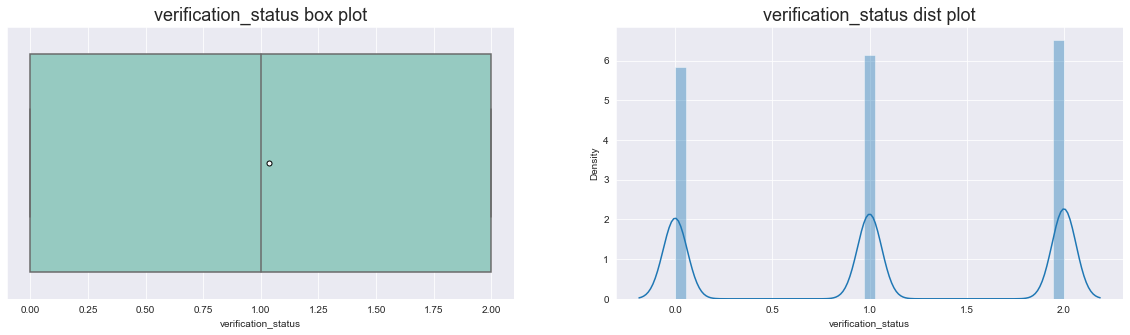

Mean is 1.0 | Median is 1.0 
# Outliers over upper limit (5.0) are 0
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


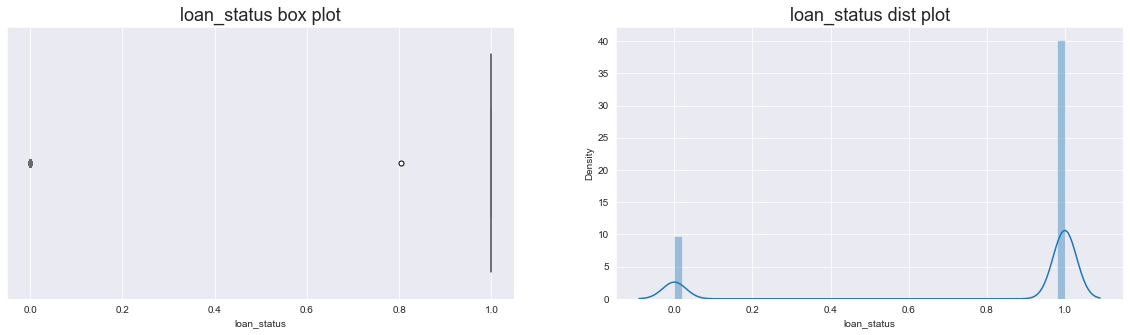

Mean is 1.0 | Median is 1.0 
# Outliers over upper limit (1.0) are 0
# Outliers under lower limit (1.0) are 77673
                                                                                
--------------------------------------------------------------------------------
                                                                                


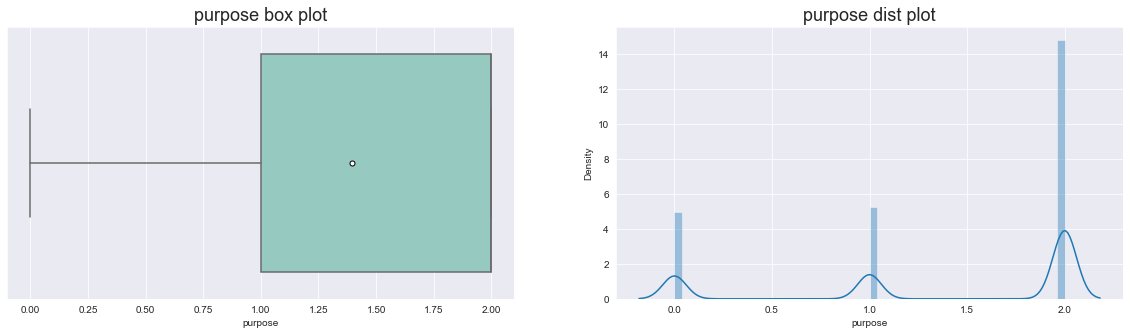

Mean is 1.0 | Median is 2.0 
# Outliers over upper limit (4.0) are 0
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


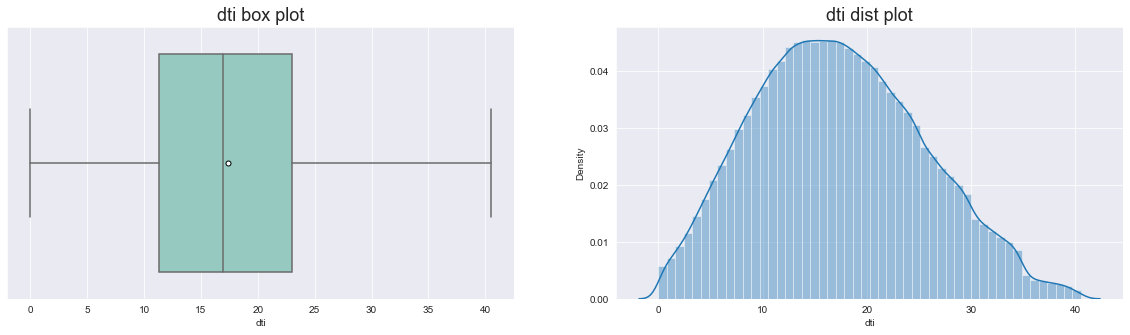

Mean is 17.0 | Median is 17.0 
# Outliers over upper limit (41.0) are 0
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


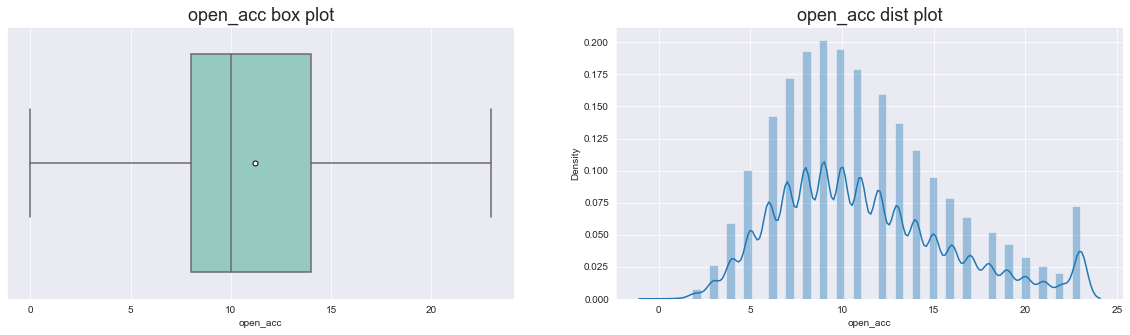

Mean is 11.0 | Median is 10.0 
# Outliers over upper limit (23.0) are 0
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


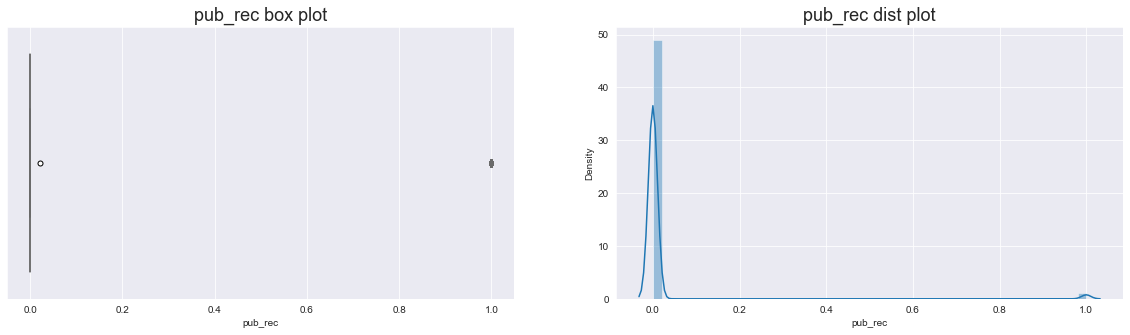

Mean is 0.0 | Median is 0.0 
# Outliers over upper limit (0.0) are 8019
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


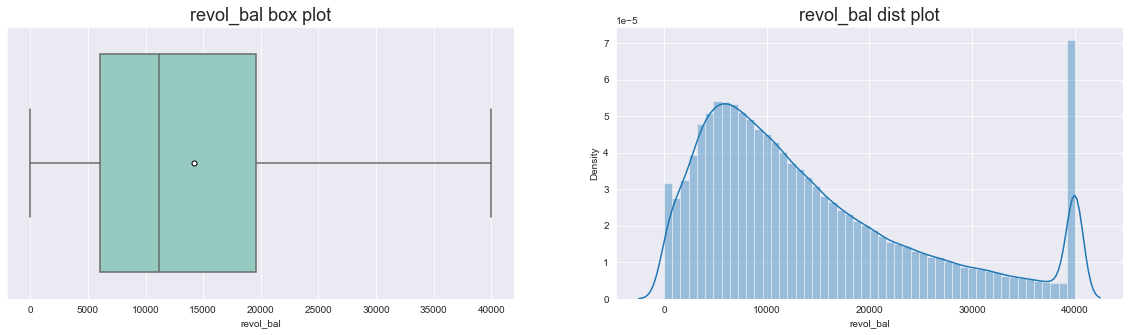

Mean is 14168.0 | Median is 11181.0 
# Outliers over upper limit (40012.0) are 0
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


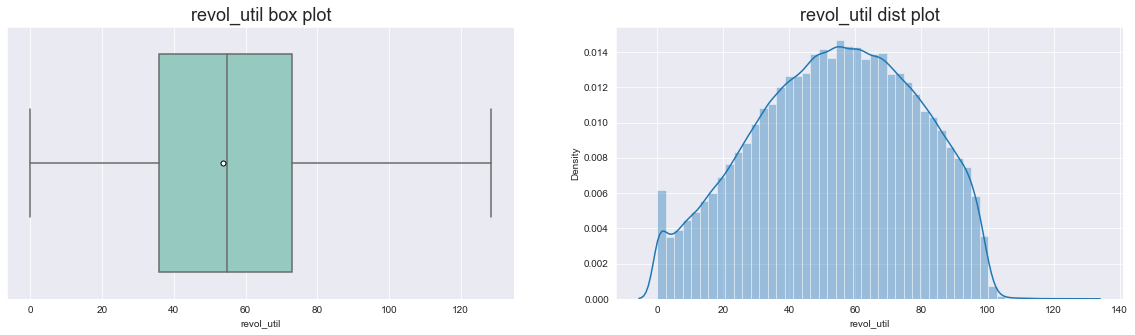

Mean is 54.0 | Median is 55.0 
# Outliers over upper limit (129.0) are 0
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


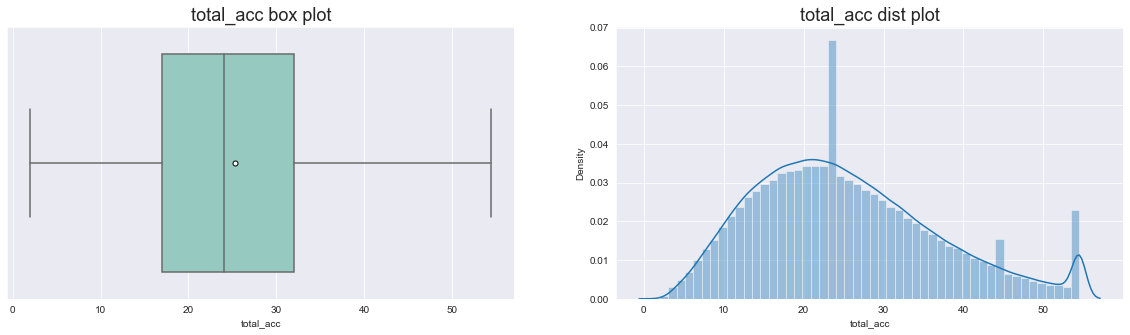

Mean is 25.0 | Median is 24.0 
# Outliers over upper limit (54.0) are 0
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


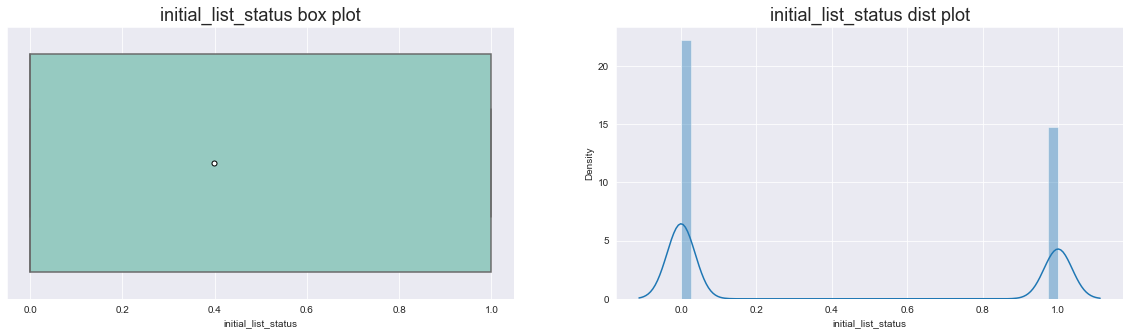

Mean is 0.0 | Median is 0.0 
# Outliers over upper limit (2.0) are 0
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


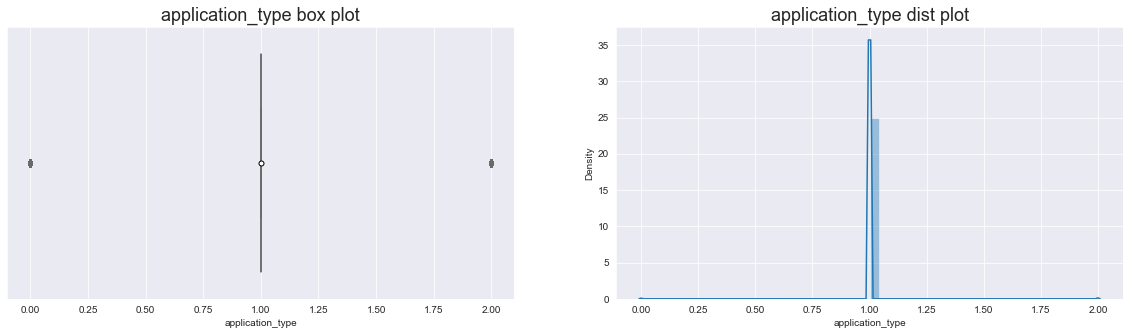

Mean is 1.0 | Median is 1.0 
# Outliers over upper limit (1.0) are 425
# Outliers under lower limit (1.0) are 286
                                                                                
--------------------------------------------------------------------------------
                                                                                


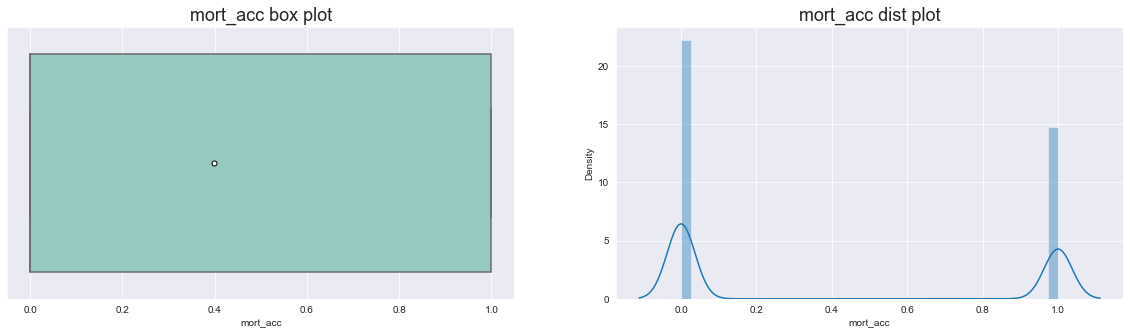

Mean is 0.0 | Median is 0.0 
# Outliers over upper limit (2.0) are 0
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


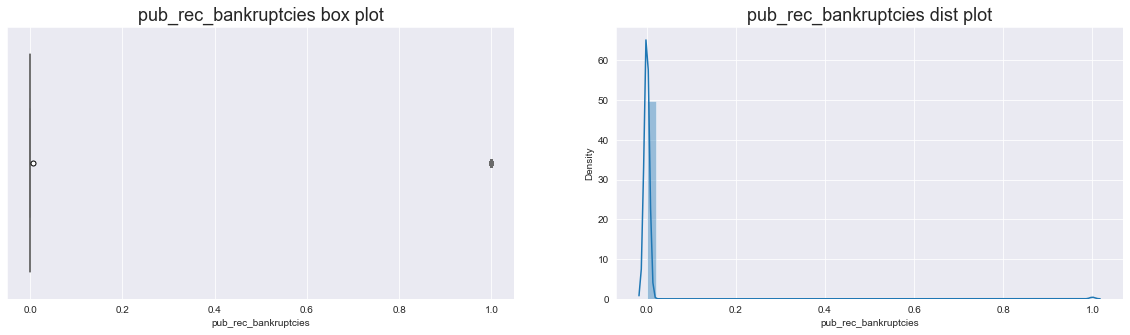

Mean is 0.0 | Median is 0.0 
# Outliers over upper limit (0.0) are 2325
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


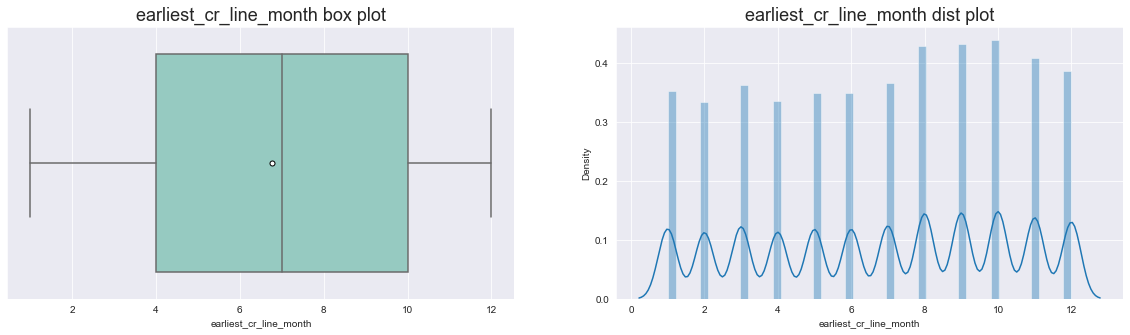

Mean is 7.0 | Median is 7.0 
# Outliers over upper limit (19.0) are 0
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


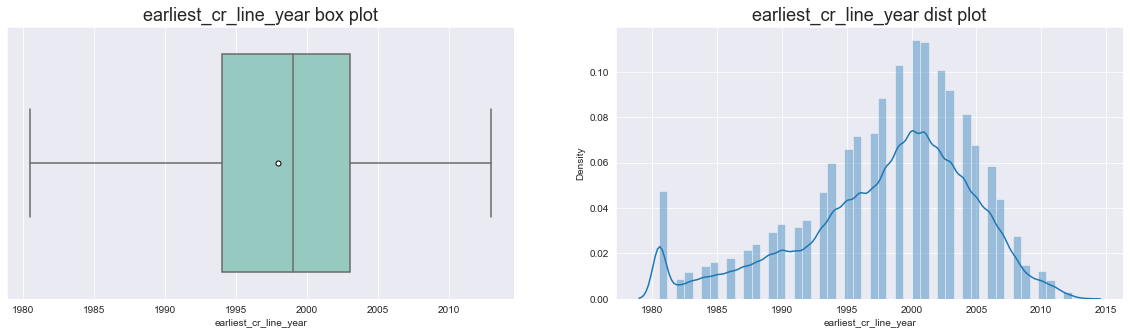

Mean is 1998.0 | Median is 1999.0 
# Outliers over upper limit (2016.0) are 0
# Outliers under lower limit (1980.0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


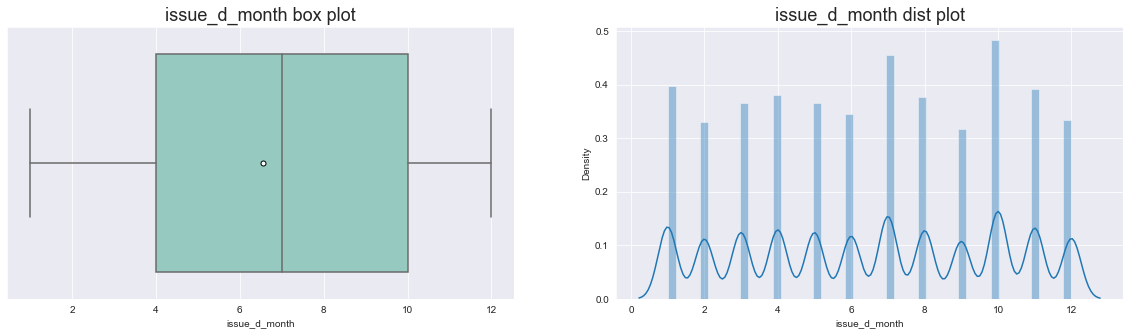

Mean is 7.0 | Median is 7.0 
# Outliers over upper limit (19.0) are 0
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


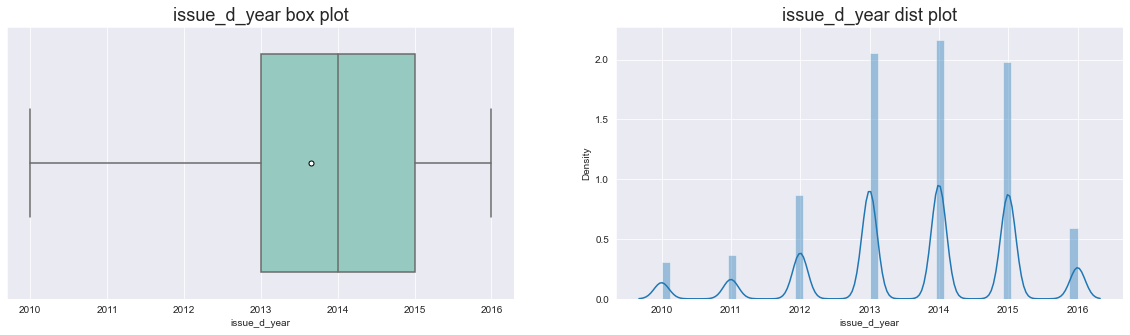

Mean is 2014.0 | Median is 2014.0 
# Outliers over upper limit (2018.0) are 0
# Outliers under lower limit (2010.0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


In [50]:
outlier_function(data)

## 5. Standardization using Robust Scaler for Independing Features 

- Since our dataset is having spikes at either min end or max end, so we are using Robust Scaler
- This scaler ignores spikes / outliers from the calculation of mean and standard deviation and then uses calculated values to scale using the below formulae
- value = (value – median) / (p75 – p25)

### Creating Independent and Dependent datasets

In [51]:
X = data[data.columns.drop('loan_status')]
Y = data['loan_status']

### Performing Robust Scaler transform of the dataset

In [52]:
from sklearn.preprocessing import RobustScaler
trans = RobustScaler()
X = trans.fit_transform(X)

In [53]:
X

array([[-0.16666667,  0.        , -0.315     , ..., -1.        ,
         0.5       , -0.18974232],
       [-0.33333333,  0.        , -0.22333333, ..., -1.        ,
         0.5       , -0.67260041],
       [ 0.3       ,  0.        , -0.47333333, ..., -1.        ,
         0.5       , -0.67260041],
       ...,
       [-0.58333333,  0.        , -0.55666667, ...,  0.5       ,
        -0.5       ,  1.12271304],
       [ 0.75      ,  1.        ,  0.33      , ...,  0.16666667,
        -1.        ,  0.        ],
       [-0.83333333,  0.        ,  0.04666667, ..., -0.16666667,
        -2.        ,  0.50697764]])

In [54]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'earliest_cr_line_month',
       'earliest_cr_line_year', 'issue_d_month', 'issue_d_year', 'Pincode'],
      dtype='object')

In [55]:
X = pd.DataFrame(X, columns=['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'earliest_cr_line_month',
       'earliest_cr_line_year', 'issue_d_month', 'issue_d_year', 'Pincode'])

In [56]:
X.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year,Pincode
0,-0.166667,0.0,-0.315000,-0.144966,-0.5,-0.222222,0.428571,1.0,1.177778,-0.5,-2.0,0.797436,1.000000,0.0,1.852740,-0.350404,0.066667,1.0,0.0,0.0,0.0,-0.166667,-1.000000,-1.000000,0.5,-0.189742
1,-0.333333,0.0,-0.223333,-0.346247,-0.5,-0.111111,-0.428571,0.0,0.022222,-0.5,0.0,0.439316,1.166667,0.0,0.658330,-0.040431,0.200000,0.0,0.0,1.0,0.0,0.000000,0.555556,-1.000000,0.5,-0.672600
2,0.300000,0.0,-0.473333,0.414992,-0.5,-0.333333,-1.000000,1.0,-0.465400,0.0,-1.0,-0.352137,0.500000,0.0,0.059287,1.008086,0.133333,0.0,0.0,0.0,0.0,0.166667,0.888889,-1.000000,0.5,-0.672600
3,-0.400000,0.0,-1.140000,-0.488311,-1.0,-1.000000,-0.142857,1.0,-0.222222,-0.5,-1.0,-1.223077,-0.666667,0.0,-0.419934,-0.897574,-0.733333,0.0,0.0,0.0,0.0,0.333333,0.777778,0.666667,0.0,-0.790726
4,1.031250,1.0,0.656667,0.737925,0.0,0.444444,0.285714,0.0,-0.200000,0.5,-1.0,1.456410,0.500000,0.0,0.985877,0.404313,1.266667,0.0,0.0,0.0,0.0,-0.666667,0.000000,-0.500000,-0.5,-0.493022


In [57]:
X.describe()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year,Pincode
count,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000
mean,0.176079,0.237419,0.050173,0.166449,-0.088832,0.110638,-0.124820,0.475122,0.155322,0.018283,-0.606083,0.037127,0.198152,0.020248,0.219727,-0.028249,0.084018,0.398869,0.000351,0.399066,0.005871,-0.040628,-0.111790,-0.074469,-0.176763,0.120912
std,0.696221,0.425502,0.741317,0.758044,0.666904,0.708631,0.523010,0.481069,0.762680,0.408323,0.796996,0.693554,0.789489,0.140849,0.787744,0.658964,0.760069,0.489666,0.042370,0.489707,0.076396,0.572502,0.752372,0.571104,0.714545,0.703419
min,-0.958333,0.000000,-1.335000,-1.133704,-1.000000,-1.111111,-1.000000,-0.250000,-1.422222,-0.500000,-2.000000,-1.445299,-1.666667,0.000000,-0.822435,-1.477089,-1.466667,0.000000,-1.000000,0.000000,0.000000,-1.000000,-2.055556,-1.000000,-2.000000,-0.790726
25%,-0.333333,0.000000,-0.473333,-0.394675,-0.500000,-0.444444,-0.571429,0.000000,-0.422222,-0.500000,-1.000000,-0.481197,-0.333333,0.000000,-0.379257,-0.512129,-0.466667,0.000000,0.000000,0.000000,0.000000,-0.500000,-0.555556,-0.500000,-0.500000,-0.493022
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.666667,0.000000,0.526667,0.605325,0.500000,0.555556,0.428571,1.000000,0.577778,0.500000,0.000000,0.518803,0.666667,0.000000,0.620743,0.487871,0.533333,1.000000,0.000000,1.000000,0.000000,0.500000,0.444444,0.500000,0.500000,0.506978
max,2.166667,1.000000,2.026667,2.105325,2.000000,1.777778,0.428571,1.000000,2.077778,0.500000,0.000000,2.018803,2.166667,1.000000,2.120743,1.987871,2.033333,1.000000,1.000000,1.000000,1.000000,0.833333,1.555556,0.833333,1.000000,1.760975


### Histograms of the independent variables

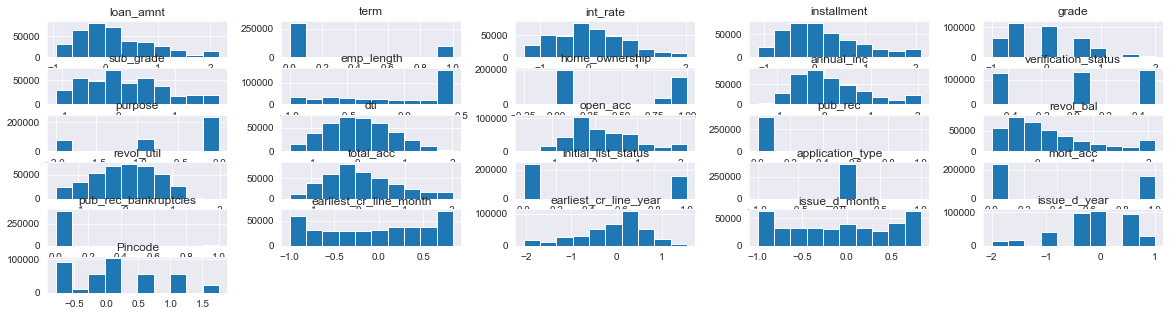

In [58]:
from matplotlib import pyplot
X.hist()
pyplot.show()

## 6. Multicollinearity Check and Treatment
### A. Correlation Matrix

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

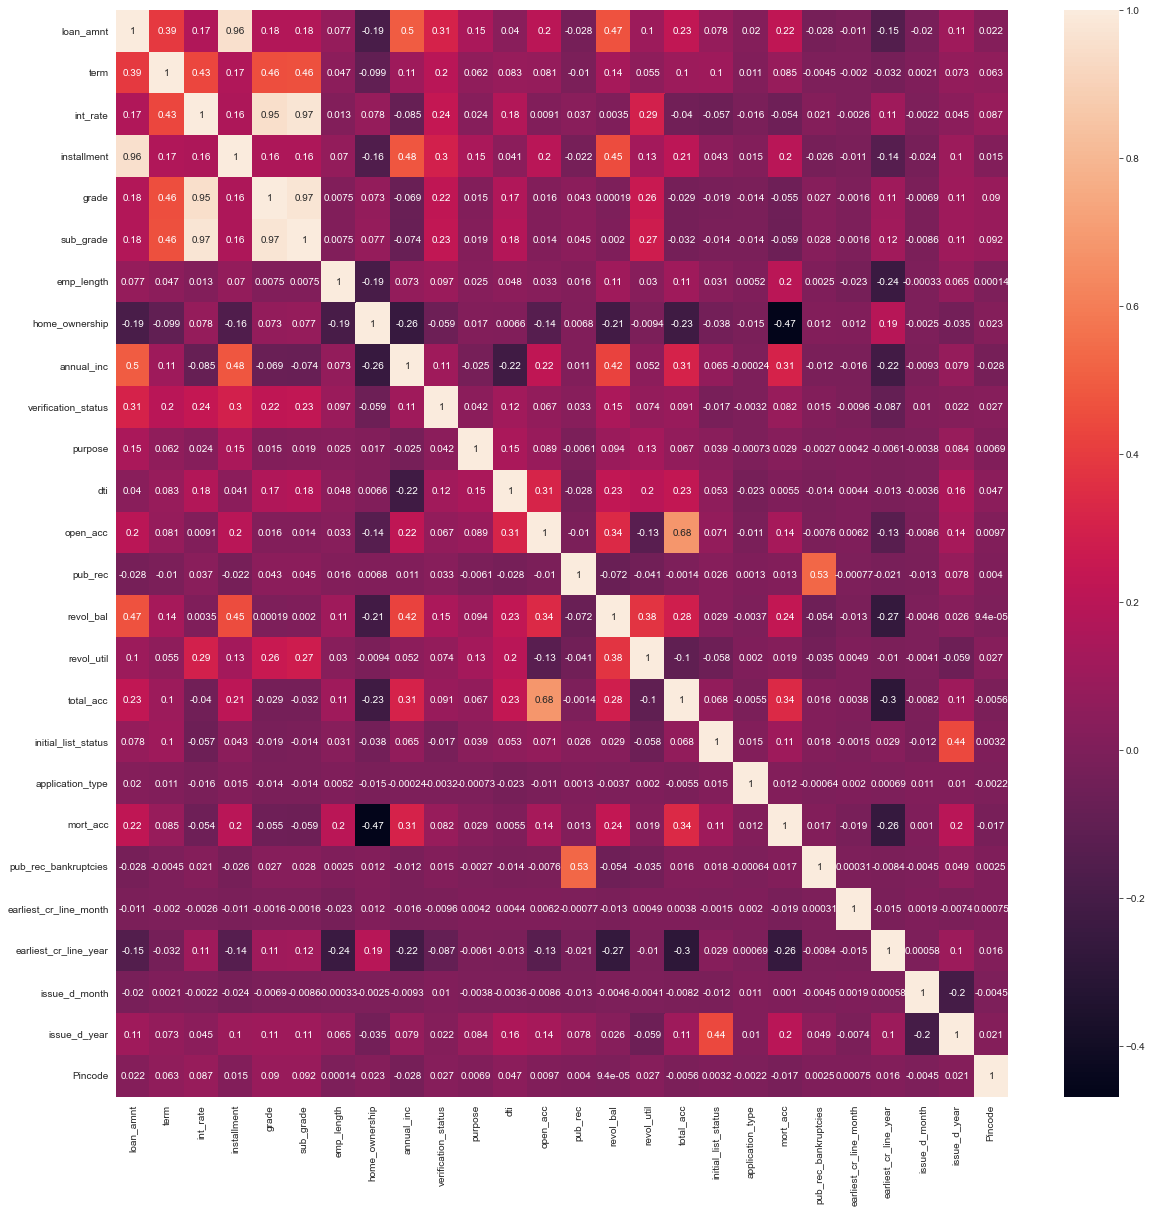

In [60]:
plt.figure(figsize = (20,20))
sns.heatmap(X.corr(),annot = True)
plt.show()

### Comment:
- There are few independent features which are highly correlated

### B. Calculation VIF for each independent variable

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
vif = pd.DataFrame()
X_t = X
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,loan_amnt,55.93
3,installment,47.36
5,sub_grade,33.77
2,int_rate,22.28
4,grade,16.78
1,term,6.79
12,open_acc,2.36
16,total_acc,2.28
14,revol_bal,2.21
19,mort_acc,1.96


### Comment
- Will check again after removing "loan_amnt", "int_rate" and "grade"
- We should not loose any information after removing the above columns because
    - We have installment column which is calculated from loan amount, int_rate
    - Sub grade is available which is detailed version of grade

### C. Checking VIF score again

In [63]:
vif = pd.DataFrame()
X_t = X.drop(["loan_amnt", "int_rate",'grade'], axis = 1)

vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,open_acc,2.33
13,total_acc,2.27
11,revol_bal,2.20
5,annual_inc,1.91
14,initial_list_status,1.82
0,term,1.78
16,mort_acc,1.76
1,installment,1.72
2,sub_grade,1.71
4,home_ownership,1.63


### Comment:
- We should remove columns "loan_amnt", "int_rate" and "grade" to remove multicollinearity
- Post removal of the above 3 columns, VIF score is below 4 for rest of the independent variables

### E. Dropping columns to remove multicollinearity

In [64]:
X = X.drop(["loan_amnt", "int_rate", "grade"],axis = 1)

# 7. Model Building

## A. Creating Training and Testing datasets

In [65]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=4)
X_train.shape

(237618, 23)

## B. Perform Logistic Regression : Using SKLearn

In [66]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() # C = 1, lambda = 1
model.fit(X_train, y_train)

LogisticRegression()

In [67]:
model.coef_

array([[-0.46900013, -0.13239309, -0.64300816, -0.01027552, -0.25160146,
         0.26138132, -0.08324838,  0.025535  , -0.24486738, -0.17735234,
        -0.20250418,  0.11583217, -0.17471716,  0.1521679 ,  0.04238005,
         0.44554647,  0.07162041,  0.13437769,  0.02816006,  0.03965676,
         0.03140242, -0.13742586, -1.22433586]])

In [68]:
model.intercept_

array([2.17482958])

In [69]:
col = list(X_test.columns)

In [70]:
coef = list(model.coef_)

In [71]:
coeff_df = pd.DataFrame(col,coef,columns = ["Feature"])

In [72]:
coeff_df = coeff_df.reset_index(level=0)

In [73]:
coeff_df.rename(columns = {"level_0" : "Coefficient"},inplace = True)
coeff_df.iloc[:,[1,0]].sort_values("Coefficient",ascending=False)

,Feature,Coefficient
15,application_type,0.445546
5,annual_inc,0.261381
13,total_acc,0.152168
17,pub_rec_bankruptcies,0.134378
11,revol_bal,0.115832
16,mort_acc,0.071620
14,initial_list_status,0.042380
19,earliest_cr_line_year,0.039657
20,issue_d_month,0.031402
18,earliest_cr_line_month,0.028160


In [74]:
print(f'Train Accuracy:{model.score(X_train,y_train)}, Val Accuracy:{model.score(X_val,y_val) }' ) 

Train Accuracy:0.8371545926655388, Val Accuracy:0.8383582051864757


## Comment:
- We are getting good Model accuracy here, 83%+
- Top 6 influencial features : "Pincode","sub_grade", "application_type", "home_ownership", "dti", "term"

## C. Hyper Parameter Tuning

In [75]:
from sklearn.pipeline import make_pipeline
train_scores = []
val_scores = []
scaler = StandardScaler()
for la in np.arange(0.01, 12000.0, 100): # range of values of Lambda
    scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la))
    scaled_lr.fit(X_train, y_train)
    train_score = scaled_lr.score(X_train, y_train)
    val_score = scaled_lr.score(X_val, y_val)
    train_scores.append(train_score)
    val_scores.append(val_score)

In [76]:
len(val_scores)

120

## Now, let's plot the graph and pick the Regularization Parameter $λ$ which gives the best validation score

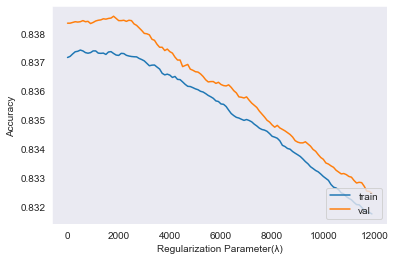

In [77]:
plt.figure()
plt.plot(list(np.arange(0.01, 12000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 12000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [78]:
np.argmax(val_scores)

18

In [79]:
val_scores[18]

0.8385854606974219

## We observe that validation score is maximum of 83.9% when index = 18, thus our $λ$ best becomes:

In [80]:
l_best = 0.01 * 18 * 100

- We do this since we are stepping 100 in each iteration

In [81]:
scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/l_best))
scaled_lr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.05555555555555555))])

## Now test this best model on our test data

In [82]:
test_score = scaled_lr.score(X_test,y_test)
print(test_score)

0.839279852536424


## D. Confusion Matrix & Scores

### Building Confusion Matrix

In [83]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [84]:
y_pred = scaled_lr.predict(X_test)

In [85]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix # 2D np array

array([[ 4689, 10655],
       [ 2075, 61787]], dtype=int64)

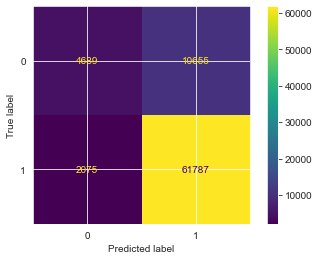

In [86]:
ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()

## Precision

In [87]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.85291681621159

## Comment:
- 85% is a good precision score
- As an NBFC is it a very healthy score, where the non performing assets are kept very low

## Recall

In [88]:
from sklearn.metrics import recall_score

In [89]:
recall_score(y_test, y_pred)

0.9675080642635683

## Comment
- 97% is a great recall score. 
- Loan Tap is doing a great job in identifying loan opportunities, which is one of the important matrix in idetifying a good NBFC.

## F1 Score

In [90]:
from sklearn.metrics import f1_score

In [91]:
f1_score(y_test, y_pred)

0.9066058222796103

## Comment:
- 91% is a great F1 Score for a NBFC
- Loan Tap is doing a great job in identifying loan opportunities, while maintaining low NPA.
- It shows healthy growth for an NBFC

## ROC AUC Curve

In [92]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

In [93]:
fpr, tpr, thr = roc_curve(y_test, y_pred)

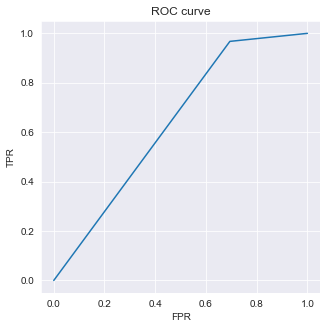

In [94]:
plt.figure(figsize = (5,5))
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [95]:
roc_auc_score(y_test, y_pred)

0.6365499132579573

### Comment:
- Since our dataset is imbalanced (80% 1 and 20% 0), ROC AUC score is not the best score to check how well Loan Tap is performing.
- Imbalanced dataset is pulling the ROC AUC numbers down.

## Precision Recall Curve

In [96]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [97]:
precision, recall, thr = precision_recall_curve(y_test, y_pred)

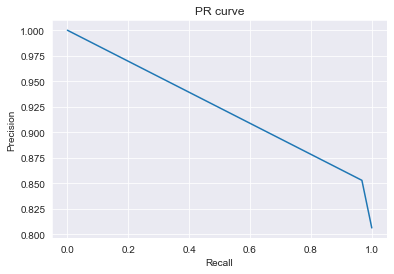

In [98]:
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [99]:
auc(recall, precision)

0.9233111953823914

### Comment:
- Excellent F1 Score of 92%
- Loan Tap is doing a great job in identifying loan opportunities, while maintaining low NPA.
- It shows healthy growth for an NBFC

## E. Model Refinement Using RFE

In [100]:
from sklearn.feature_selection import RFE

In [101]:
rfe = RFE(model, 2)

In [102]:
rfe = rfe.fit(X_train, y_train)

In [103]:
print(rfe.support_)
print(rfe.ranking_)

[False False  True False False False False False False False False False
 False False False False False False False False False False  True]
[ 2 13  1 22  3  6 15 21  4 10  7 14 11  9 17  5 16  8 20 18 19 12  1]


In [104]:
cols = np.array(list(X_test.columns))
cols

array(['term', 'installment', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'earliest_cr_line_month',
       'earliest_cr_line_year', 'issue_d_month', 'issue_d_year',
       'Pincode'], dtype='<U22')

In [122]:
rfe.ranking_ = rfe.ranking_.astype('float64')

In [123]:
coeff_df = pd.DataFrame(np.array([cols,rankings,rfe.support_]).transpose(),columns = ["Feature", "Rank","Support"])
coeff_df.sort_values("Rank")

,Feature,Rank,Support
22,Pincode,1.0,True
2,sub_grade,1.0,True
9,open_acc,10.0,False
12,revol_util,11.0,False
21,issue_d_year,12.0,False
1,installment,13.0,False
11,revol_bal,14.0,False
6,verification_status,15.0,False
16,mort_acc,16.0,False
14,initial_list_status,17.0,False


### Comment:
- sub_grade, dti, home_ownership, application_type, term and total_acc are the most important features

# Trade off question:

### How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.



- We might need a better technique to flag False positive in the current model as True Negative and identifying False Negative as True positive


- If that can be done, we could use the money alloted to these false positive individuals and bring more interset earning opportnity from false negative individuals

### Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone

- Loan Tap is havin 20% individuals as NPA in its data
- However it is doing a great job in identifying loan opportunities with Recall of 97%


- As an NBFC it is having healthy score of 85% for Precision and F1 score of 91%; however we can try and improve on in correctly flagging False Positive as True Negative, hence decresing probability for default.


- Industry should look for healthy f1 score, which balanced opportunities vs default. Additionally big banks can target high precision score as they would not want to loose money of account holders. Whereas NBFC should target higher recall for multi x growth.

# Insights & Recommendations:

''' 
- 1 to 5 are already done before
1.	What percentage of customers have fully paid their Loan Amount?
2.	Comment about the correlation between Loan Amount and Installment features.
3.	The majority of people have home ownership as _______.
4.	People with grades ‘A’ are more likely to fully pay their loan. (T/F)
5.	Name the top 2 afforded job titles.
- 6 to 9 are below
6.	Thinking from a bank's perspective, which metric should our primary focus be on..
    1.	ROC AUC
    2.	Precision
    3.	Recall
    4.	F1 Score
7.	How does the gap in precision and recall affect the bank?
8.	Which were the features that heavily affected the outcome?
9.	Will the results be affected by geographical location? (Yes/No)
'''

### 6.Thinking from a bank's perspective, which metric should our primary focus be on..
    1. ROC AUC
    2. Precision
    3. Recall
    4. F1 Score

- F1 Score generally for any bank
- Precision specially for big banks
- Recall specially for NBFCs


- Details are below:

- ROC AUC curve:  It should only be used when we have balanced datsets. Practically most of the individuals pay their loans and their are few defaulters. It is very difficult for banking data to be balanced. So ROC AUC is not the best measure for banking sector.

- Precision: It is important when we are more conerned with "False Positives". Practically when we want to make sure all the people whom we have given loan to should repay. Good measure to measure non performing assets. Generally used by big banks.

- Recall: It is important when we are more concened with "False Negative". Practically; from all the loan application which we recived, it is a ratio of "loan given and repayed / total individuals who would repay". Generally used by NBFCs as they would not want to miss any good opportunity.

- F1 Score: It is harmonic mean of Precision and Recall. Ideally a bank should have good F1 Score as it balanced Precision and Recall or practically low NPA and good loan opportunity.

### 7. How does the gap in precision and recall affect the bank?

- Loan Tap has Precision Score of 85% and Recall score of 97%.
- I believe as an NBFC it is doing a great job in identifying opportunities, with Recall Score of 97%
- While balacing a very healthy Precision Score of 85%, low NPAs

- Loan Tap can look to further improve its Precision by more accuratly identifying False Positive. This will further decrease non performing assets.

### 8. Which were the features that heavily affected the outcome?

Top 7 factor influencing the outcome are
- Pincode or Address
- Sub_Grade
- Term
- Home_ownership
- DTI
- Application Type
- Annual Income 

### 9. Will the results be affected by geographical location? (Yes/No)

 - Yes, Pincode which has been created from the Addres field is one of the important factor influencing whether loan is likely to be repaid or not